# **Equipo 2**

## **Proyecto: Cancer de mama en M�xico**

#### Integrantes:
- Zo� Ariel Garc�a Mart�nez
- Atenea De La Cruz Brito
- Juan Luis Carrillo de la Cruz

### Pregunta 1

#### �C�mo ha sido el crecimiento en la incidencia del c�ncer de mama?

Con el objetivo de analizar este problema con m�s detalle, se propone realizar el an�lisis de los dataset (DS) ```DATA_SICAM``` y ```Morbilidad_2013_2019```, previamente analizados y ya listo para gr�ficas y an�lisis estad�sticos. donde se puede obtener informaci�n acerca de mastograf�as, as� como las entidades donde se han registrado los diagn�sticos y los grupos de edad en los que se presenta, adem�s de la morbilidad por entidad federativa. Adem�s, se intentara buscar si existe alguna relaci�n entre el n�mero de mastograf�as realizadas con la incidencia de c�ncer de mama.

Fuentes de informaci�n:

[INEGI (2020) ESTAD�STICAS A PROP�SITO DEL D�A MUNDIAL DE LA LUCHA CONTRA EL C�NCER DE MAMA (19 DE OCTUBRE).](https://www.inegi.org.mx/contenidos/saladeprensa/aproposito/2020/Cancermama20.pdf)

[INEGI (2021) ESTAD�STICAS A PROP�SITO DEL D�A MUNDIAL CONTRA EL C�NCER (4 DE FEBRERO).](https://www.inegi.org.mx/contenidos/saladeprensa/aproposito/2021/cancer2021_Nal.pdf)

Los DS se analizar�n siguiendo el flujo de trabajo presentado a continuaci�n...

In [ ]:
# Importamos las librerias y obtenemos 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn  as sns
import folium
import geopandas as gpd
sns.set(style='whitegrid')

In [ ]:
sicam13_estado = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2013_SICAM_estado.csv", index_col=0)
sicam13_estado.head()

resultado               estado  count
0  Altamente Sugestiva a Malignidad       Aguascalientes     31
1  Altamente Sugestiva a Malignidad      Baja California     31
2  Altamente Sugestiva a Malignidad  Baja California Sur      2
3  Altamente Sugestiva a Malignidad             Campeche     25
4  Altamente Sugestiva a Malignidad              Chiapas      1

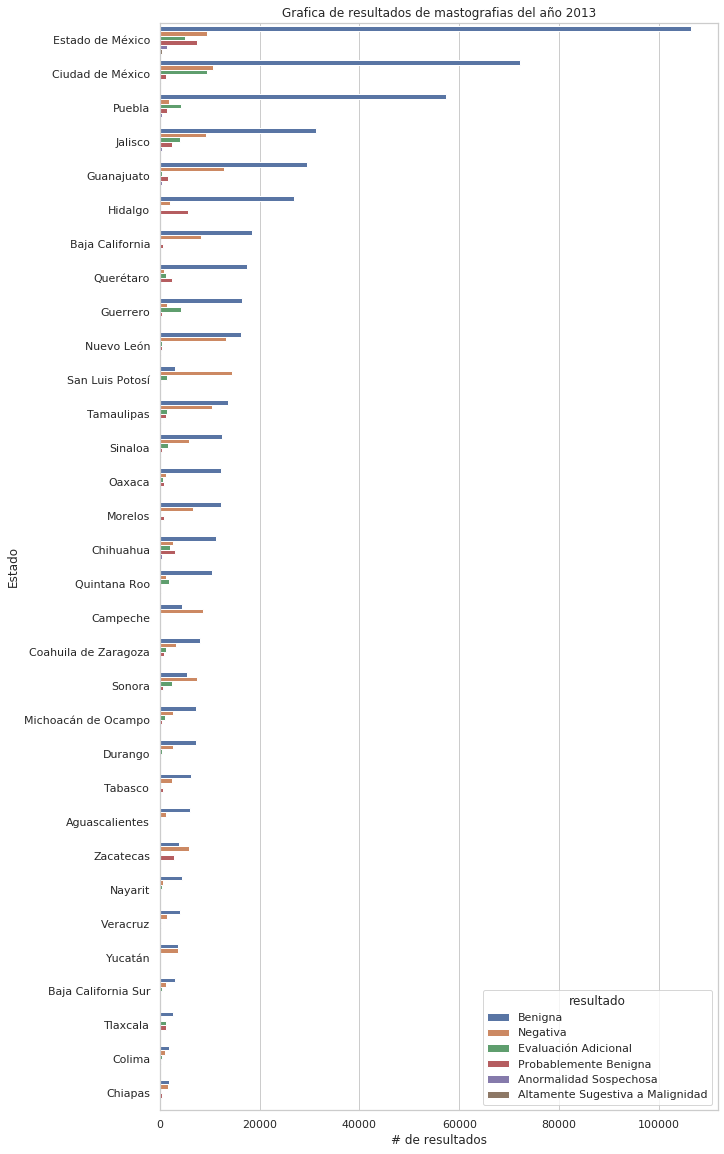

In [ ]:
# Graficas de barras
fig = plt.figure(figsize=(10,20))
ax = sns.barplot(x='count', y='estado', data=sicam13_estado.sort_values(by='count', ascending=False), orient='h', hue='resultado') #dodge = false
ax.set_title('Grafica de resultados de mastografias del a�o 2013')
ax.set(xlabel='# de resultados', ylabel='Estado');

Ya que la grafica de barras nos indica una gran diferencia entre el n�mero de mastograf�as presetadas en los diferentes estados, consideramos que la mejor manera de presentar este tipo de datos es usando mapas. 

In [ ]:
# cargamos el geojson con la geometria de los estados de M�xico
mexico = '../Equipo_2_P2_Analisis/DATA/mexico.json'
fname = mexico
mxn = gpd.read_file(fname)
mxn = mxn[1:][['name', 'geometry']]
mxn = mxn.rename(columns= {'name': 'estado'})
mxn

estado                                           geometry
1       Baja California  MULTIPOLYGON (((-114.14750 28.00015, -114.2070...
2   Baja California Sur  MULTIPOLYGON (((-109.79843 24.15516, -109.8624...
3              Coahuila  POLYGON ((-99.80696 27.77142, -99.96720 27.640...
4             Chihuahua  POLYGON ((-106.50605 31.77026, -106.42895 31.7...
5               Durango  POLYGON ((-103.62726 26.64393, -103.32570 26.4...
6               Sinaloa  MULTIPOLYGON (((-108.88272 25.44318, -108.8188...
7                Sonora  MULTIPOLYGON (((-109.23137 26.26342, -109.2254...
8             Zacatecas  POLYGON ((-100.82844 24.56496, -100.86968 24.4...
9            Nuevo Le�n  POLYGON ((-99.80696 27.77142, -99.74044 27.722...
10      San Luis Potos�  POLYGON ((-100.05727 23.24106, -100.08926 23.1...
11           Tamaulipas  POLYGON ((-97.13927 25.96583, -97.16747 25.828...
12       Aguascalientes  POLYGON ((-101.84543 22.01747, -101.89173 21.9...
13               Colima  MULTIPOLYGON (((-110.92431 18.72736, -110.9794...
14              Jalisco  POLYGON ((-102.76049 21.74880, -102.66138 21.7...
15            Michoac�n  POLYGON ((-100.28599 20.21339, -100.23571 20.1...
16              Nayarit  MULTIPOLYGON (((-106.43706 21.49595, -106.3727...
17             Campeche  MULTIPOLYGON (((-91.52440 18.76659, -91.62084 ...
18               Oaxaca  POLYGON ((-98.55455 16.31828, -98.51943 16.350...
19               Puebla  POLYGON ((-96.72812 18.41025, -96.78951 18.283...
20              Tabasco  POLYGON ((-90.99090 17.80196, -90.99199 17.251...
21             Tlaxcala  POLYGON ((-98.64087 19.46191, -98.64749 19.513...
22     Distrito Federal  POLYGON ((-98.96395 19.08912, -99.01780 19.086...
23           Guanajuato  POLYGON ((-99.79062 21.41911, -99.79253 21.291...
24             Guerrero  POLYGON ((-99.49550 18.67405, -99.50738 18.624...
25              Hidalgo  POLYGON ((-98.00019 20.48449, -98.05248 20.427...
26               M�xico  POLYGON ((-98.65948 19.58552, -98.70909 19.582...
27              Morelos  POLYGON ((-98.96395 19.08912, -98.89326 19.072...
28            Quer�taro  POLYGON ((-99.04338 21.26831, -99.04230 21.175...
29             Veracruz  POLYGON ((-97.78186 22.27335, -97.77135 22.131...
30              Chiapas  MULTIPOLYGON (((-93.97061 16.00979, -94.11486 ...
31         Quintana Roo  MULTIPOLYGON (((-86.74901 20.56769, -86.79711 ...
32              Yucat�n  POLYGON ((-87.53801 21.49942, -87.52509 21.298...

In [ ]:
# realizamos la funcion de un mapa multicapa

def map_mul(jsn, data, var, count,  location, zoom, title='Titulo', res='Resultados'):
    '''
    Funcion que entrega un "Choropleth map" multicapa,
    �til para realizar mapas de diferentes variables
    en un mimso data set. Es necesario tener un geojson
    con los valores a usar (e.j. poligonos)
    
    jsn: geojson que contiene los valores espaciales
    data: Dataframe de los datos
    var: variable que queremos localizer
    count: conteo de los datos de la variable a usar
    title: titulo.
    res: Titulo de los resultados.
    location: centro del mapa [y,x]
    zoom: zoom de la capa
    
    Nota: por el momento solo funciona con geojson usado en 
    clase, falta poder dar las propiedad de forma correcta 
    en la variable 'key_on' de folium.Choropleth
    '''
    
    # Usamos un array con los nombres de las variables para el loop que preparara el mapa
    res = pd.unique(data[var])
    
    # usando folium realizamos el mapa con diferentes capas
    mymap =  folium.Map(location=location, zoom_start=zoom, width="100%", height='100%')
    for i in range(0,len(res)):
        folium.Choropleth(
            geo_data = jsn,
            name=f'{title} {res[i]}',
            data=data[data[var]  == res[i]],
            columns=[var, count],
            key_on='feature.properties.estado',
            fill_color='YlGn',
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name=f'{res} {res[i]}'
        ).add_to(mymap)
        
    folium.LayerControl().add_to(mymap)
    
    return mymap


# Intente realizar la funcion y arroja el mapa, pero no imprime nada a pesar de darme el bjeto de folium.

In [ ]:
# renombramos los datos y los preparamos para el mapa
renombre = {
    'Coahuila de Zaragoza': 'Coahuila',
    'Ciudad de M�xico': 'Distrito Federal',
    'Michoac�n de Ocampo': 'Michoac�n',
    'Veracruz de Ignacio de la Llave': 'Veracruz',
    'Estado de M�xico': 'M�xico'
}

sicam13_estado = sicam13_estado.replace({"estado": renombre})

In [ ]:
# Usamos un array con los nombres de las variables para el loop que preparara el mapa
res = pd.unique(sicam13_estado['resultado'])

# usando folium realizamos el mapa con diferentes capas
mymap =  folium.Map(location=[25, -100], zoom_start=4.4, width="100%", height='100%')

for i in range(0,len(res)):
    folium.Choropleth(
        geo_data = mxn,
        name=f'Resultados mastografias {res[i]}',
        data=sicam13_estado[sicam13_estado['resultado']  == res[i]],
        columns=['estado', 'count'],
        key_on='feature.properties.estado',
        fill_color='YlGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'Resultados mastografias {res[i]}'
    ).add_to(mymap)

folium.LayerControl().add_to(mymap)

mymap

El mapa anterior nos ayuda a visualizar de forma interactiva el total de mastograf�as realizadas dependiendo de sus resultados. La navegaci�n es simple, el mapa presenta diferentes capas que se pueden encender y apagar y de esta forma ver los estados tienen una mayor o un menor numero de tumores benignos, por poner un ejemplo. 

## An�lisis para todo M�xico

A continuaci�n presentamos nuestro DS del SICAM para el rango de a�os entre el 2013-2019, donde haremos un dataframe con los resultados.

In [ ]:
# Cargamos los DS para cada a�o

# 2014
sicam14_estado = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2014_SICAM_estado.csv", index_col=0)
sicam14_estado = sicam14_estado.replace({"estado": renombre})

# 2015
sicam15_estado = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2015_SICAM_estado.csv", index_col=0)
sicam15_estado = sicam15_estado.replace({"estado": renombre})

# 2016
sicam16_estado = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2016_SICAM_estado.csv", index_col=0)
sicam16_estado = sicam16_estado.replace({"estado": renombre})

# 2017
sicam17_estado = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2017_SICAM_estado.csv", index_col=0)
sicam17_estado = sicam17_estado.replace({"estado": renombre})

# 2019
sicam19_estado = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2019_SICAM_estado.csv", index_col=0)
sicam19_estado = sicam19_estado.replace({"estado": renombre})

In [ ]:
# Hacems un DF con todos los datos
masto = sicam13_estado.append([sicam14_estado, sicam15_estado, sicam16_estado, sicam17_estado, sicam19_estado]).reset_index(drop=True)
masto.tail()

resultado      estado  count
1443  Riesgo Moderado de Malignidad     Tabasco      4
1444  Riesgo Moderado de Malignidad  Tamaulipas     19
1445  Riesgo Moderado de Malignidad    Tlaxcala      1
1446  Riesgo Moderado de Malignidad     Yucat�n      2
1447  Riesgo Moderado de Malignidad   Zacatecas      9

In [ ]:
# ahora presenta una gr�fica de barras para saber que estado es el que tiene el mayor n�emero de pruebas
masto_gp = masto.groupby("estado")["count"].sum()
masto_gp = masto_gp.to_frame()
masto_gp = masto_gp.reset_index()
masto_gp = masto_gp.sort_values(by="count", ascending=False)
fig = plt.figure(figsize=(10,20))
ax = sns.barplot(data=masto_gp, x="count", y="estado", orient='h',  palette="Paired" )
ax.set_title('Grafica del total de mastografias del a�o 2013')
ax.set(xlabel='# de mastograf�as', ylabel='Estado');

Podemos observar que se encuentra un gran n�mero de mastograf�as en el Estado de M�xico y en el Distrito Federal, y a partir de ah� van descendiendo el n�mero de mastograf�as realizadas, presenta l�gica teniendo en cuenta que disminuye de acuerdo a la densidad poblacional de cada estado.

Ahora vamos a an�izar dos resultados que son importantes, los tumores que fueron detectados como benignos, y aquellos que presentan una alta suguestiva a malignidad.

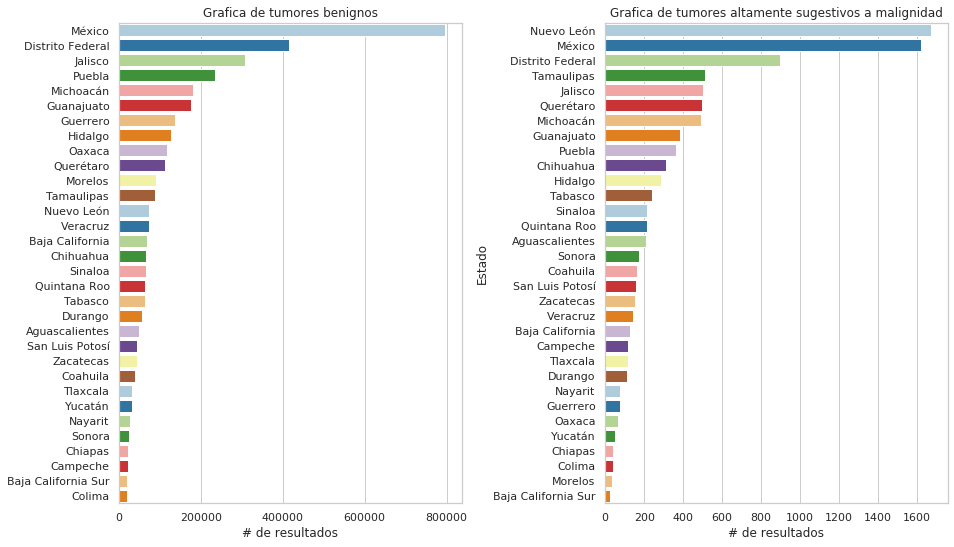

In [ ]:
# analizamos usando una grafica de barras

masto_agre = masto[masto['resultado'] == 'Altamente Sugestiva a Malignidad']
masto_agre = masto_agre.groupby('estado').sum()
masto_agre = masto_agre.reset_index()
masto_agre = masto_agre.sort_values(by='count', ascending=False)

masto_beni = masto[masto['resultado'] == 'Benigna']
masto_beni = masto_beni.groupby('estado').sum()
masto_beni = masto_beni.reset_index()
masto_beni = masto_beni.sort_values(by='count', ascending=False)

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,10))

fig.tight_layout(pad=9)


sns.barplot(x='count', y='estado', data=masto_beni, orient='h', palette="Paired", ax=axes[0])
axes[0].set_title('Grafica de tumores benignos')
axes[0].set(xlabel='# de resultados', ylabel='')
axes[0].locator_params(axis='x', nbins=5);

sns.barplot(x='count', y='estado', data=masto_agre, orient='h', palette="Paired", ax=axes[1])
axes[1].set_title('Grafica de tumores altamente sugestivos a malignidad')
axes[1].set(xlabel='# de resultados', ylabel='Estado')
axes[1].locator_params(axis='x', nbins=10)


Observando de forma forma detenida los resultados del total de mastograf�as realizadas y los resultados como beningnos y altamente sugestivos a malignidad, podemos observar que el total de mastograf�as que dan como resultado tumores benignos en el estado de Nuevo Le�n se encuentra muy por debajo de los otros estados en comparaci�n con los resultados que tumores que presenta una alta sugestiva a malignidad, donde esta a la cabeza de todos.

Otra forma de ver observar estos cambios, y de mejor forma que usando la gr�fica de barras, es mediante el uso de los **Mapas**, de los cuales vamos a presentar un mapa interactivo en el cual obtendremos 3 capas: el total de mastograf�as, el total con resultado benigno y el total con resultado altamente sugestivo a malignidad.

In [ ]:
# Cambiamos el nombre de alguas columnas con el diccionario usado anteriormente para poder asociarlo al geojson
masto_gp = masto_gp.replace({'estado': renombre})
masto_agre = masto_agre.replace({'estado': renombre})
masto_beni = masto_beni.replace({'estado': renombre})

In [ ]:
mymap =  folium.Map(location=[25, -100], zoom_start=4.5, width="100%", height='100%')

# Total de mastograf�as

folium.Choropleth(
    geo_data = mxn,
    name=f'Total de mastograf�as realizadas',
    data=masto_gp,
    columns=['estado', 'count'],
    key_on='feature.properties.estado',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name=f'Total de mastograf�as realizadas (2013-2019)'
).add_to(mymap)

# Total con resultado benigno

folium.Choropleth(
    geo_data = mxn,
    name=f'Resultados mastografias: Benignas',
    data=masto_beni,
    columns=['estado', 'count'],
    key_on='feature.properties.estado',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name=f'Resultados mastografias: Benignas (2013-2019)'
).add_to(mymap)

# Total con resultado altamente sugestivo a malignidad

folium.Choropleth(
    geo_data = mxn,
    name=f'Resultados mastografias: Altamente Sugestiva a Malignidad',
    data=masto_agre,
    columns=['estado', 'count'],
    key_on='feature.properties.estado',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name=f'Resultados mastografias: Altamente Sugestiva a Malignidad (2013-2019)'
).add_to(mymap)


folium.LayerControl().add_to(mymap)

mymap

De forma m�s clara podemos observar que los dos estados m�s n�mero de mastograf�as y con mayor n�mero de resultado benigno se presentan en el Estado de M�xico y en el Distrito Federal, y al apagar o encender sus capas el cambio de coloraciones es imperceptible. Sin embargo, al sobre poner la capa de resultados altamente sugestivos a malignidad claramente hay un cambio pues el estado de Nuevo Le�n resalta de los dem�s, por esta raz�n, en ocasiones los mapas suelen ser m�s comunicativos a la hora de graficar algunos resultados.

#### Cambios en el n�mero de mastograf�as con respecto a cada a�o

Ahora analizaremos si se han realizado m�s o menos estudios a lo largo del tiempo.

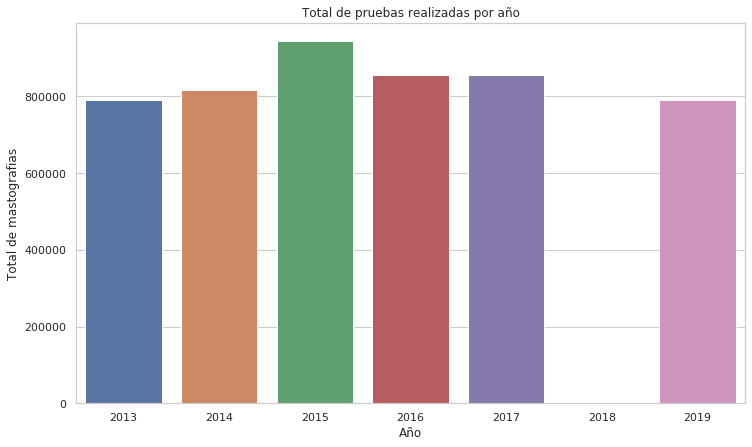

In [ ]:
# realiamos un DS con el total por a�o
conteo = {'A�o': list(range(2013, 2020)), 
          'Numero de pruebas': [sicam13_estado['count'].sum(), sicam14_estado['count'].sum(), 
                                sicam15_estado['count'].sum(), sicam16_estado['count'].sum(),
                                sicam17_estado['count'].sum(), np.nan, sicam19_estado['count'].sum()]}
conteo = pd.DataFrame(conteo)


fig = plt.figure(figsize=(12,7))
ax = sns.barplot(x='A�o', y='Numero de pruebas', data=conteo)
ax.set_title('Total de pruebas realizadas por a�o')
ax.set(ylabel='Total de mastografias');

La grafica nos muestra que existia un aumento en el numero de mastograf�as aplicadas, pero a partir del 2015 pareciera que estos estudios empezaron a disminuir. Una posible respuesta al porque han disminuido el n�mero de pruebas ser�a analizar el gasto p�blico usado y si este esta relacionado con esta disminuci�n.

#### Edades con mayor n�mero de mastograf�as

La otra pregunta que nos hacemos es la edades en las cuales las mujeres se realizan mastograf�as, para eso es necesario importar nuestros DS que se han limpiado previamente.

In [ ]:
# Cargamos los dataset
sicam13_edad = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2013_SICAM_edad.csv", index_col=0)
sicam14_edad = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2014_SICAM_edad.csv", index_col=0)
sicam15_edad = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2015_SICAM_edad.csv", index_col=0)
sicam16_edad = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2016_SICAM_edad.csv", index_col=0)
sicam17_edad = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2017_SICAM_edad.csv", index_col=0)
sicam19_edad = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/SICAM/masto_2019_SICAM_edad.csv", index_col=0)

# Juntamos los datos
sicam_edad = sicam13_edad.append([sicam14_edad,sicam15_edad,sicam16_edad,sicam17_edad,sicam19_edad])

sicam_edad_group = sicam_edad.groupby(["resultado", "edad"])["count"].sum()
sicam_edad_group = sicam_edad_group.reset_index()
sicam_edad_group["edad"] = pd.to_numeric(sicam_edad_group["edad"], downcast="integer")

In [ ]:
# Haceos una lista para el loop de las barras cumulativas
res = pd.unique(sicam_edad_group["resultado"])

# Una lista con varios colores para la paleta
col_pl = ["C0", "C1", "C2", "deepskyblue", "c", "darkorange", "firebrick", "ivory", "k"]

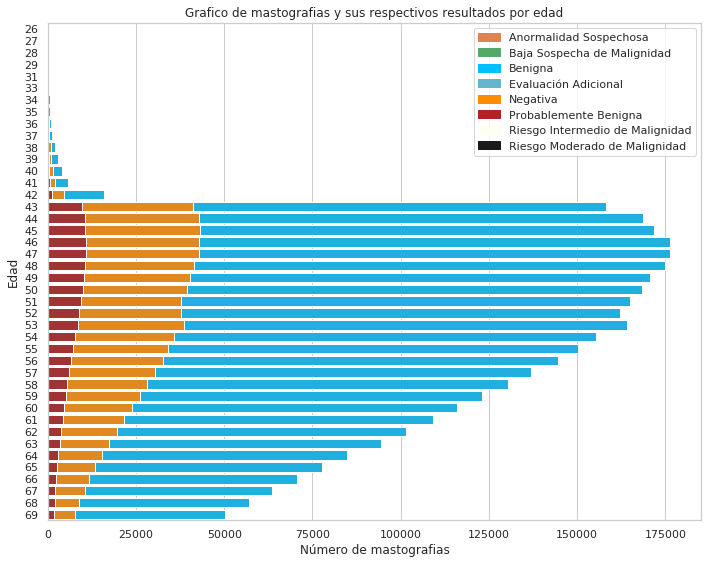

In [ ]:
# realizamos la figura de acuerdo el tipo de resultado y las edades

fig, ax = plt.subplots(figsize=(10,8))

leg = []
for i in range(1, len(res)):
    sicam_edad_fil = sicam_edad_group[sicam_edad_group['resultado'] == res[i]]
    sns.barplot(x='count', y='edad', orient="h", data=sicam_edad_fil, color=col_pl[i])
    leg.append(mpatches.Patch(color=col_pl[i], label=res[i]))

ax.set_xlabel('N�mero de mastografias')
ax.set_title('Grafico de mastografias y sus respectivos resultados por edad')
ax.set_ylabel('Edad')
ax.legend(handles=leg)
plt.tight_layout()

plt.show()

En esta ultima gr�fica podemos observar que despu�s de los 43 a�os, existe un aumento muy considerable en los estudios de mastograf�as, y de igual forma, los resultados nos indican que podemos tener una mayor incidencia de tumores en las mujeres. 

Ahora presentaremos un rango de edades que presenten un mayor y menor cantidad de resultados benignos y con alta incidencia a malignidad.

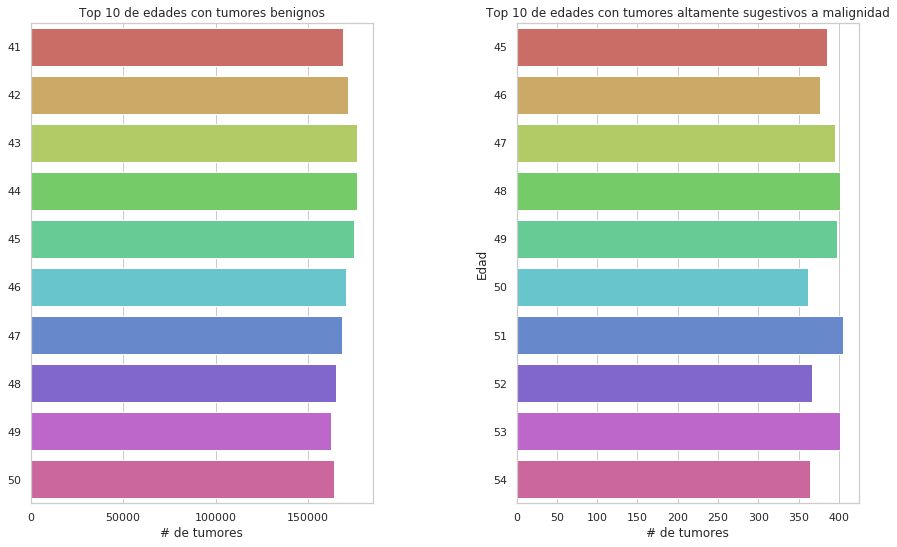

In [ ]:
# Analizaremos cuales son las edades que presentan una mayor y menor cantidad de resultados benignos
# de acuerdo a la edad.

edad_top10_ben = sicam_edad_group[sicam_edad_group["resultado"] == "Benigna"].sort_values(by="count",ascending =False).head(10)

edad_top10_mal = sicam_edad_group[sicam_edad_group["resultado"] == "Altamente Sugestiva a Malignidad"].sort_values(by="count",ascending =False).head(10)

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,10))

fig.tight_layout(pad=9)

sns.barplot(x='count', y='edad', data=edad_top10_ben, orient='h', palette="hls", ax=axes[0])
axes[0].set_title('Top 10 de edades con tumores benignos')
axes[0].set(xlabel='# de tumores', ylabel='')
axes[0].locator_params(axis='x', nbins=5)

sns.barplot(x='count', y='edad', data=edad_top10_mal, orient='h', palette="hls", ax=axes[1])
axes[1].set_title('Top 10 de edades con tumores altamente sugestivos a malignidad')
axes[1].set(xlabel='# de tumores', ylabel='Edad')
axes[1].locator_params(axis='x', nbins=10);

A partir de esta grafica de barras podemos notar que a partir de los 41 a�os es la edad en la cual se presenta mayor cantidad de tumores benignos y a partir de los 45 a�os es cuando aparecen los tumores con alta incidencia a malignidad.

De la misma manera podemos ver cuales son las edades que presentan menor numero de resultados con tumores altamente sugestivos a malignidad y benignos.

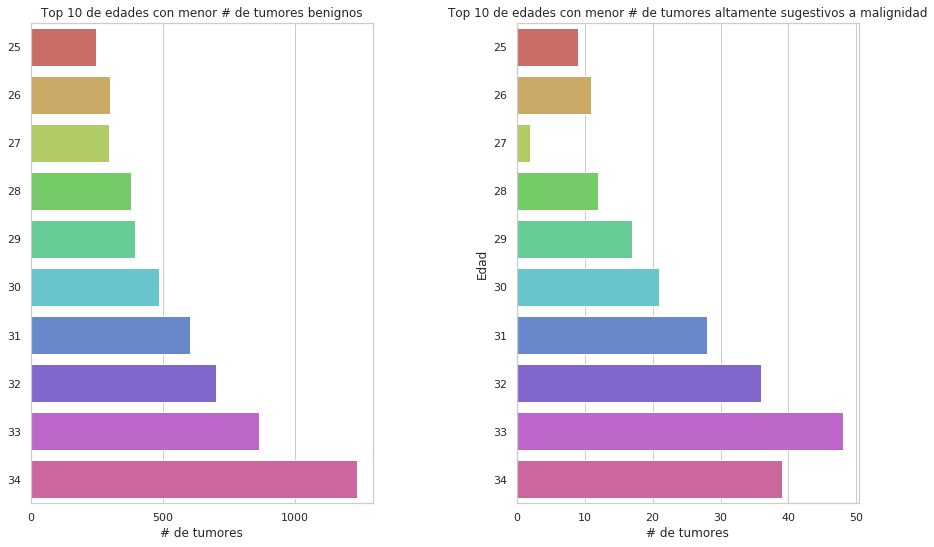

In [ ]:
edad_less10_ben = sicam_edad_group[sicam_edad_group["resultado"] == "Benigna"].sort_values(by="count",ascending =False).tail(10)

edad_less10_mal = sicam_edad_group[sicam_edad_group["resultado"] == "Altamente Sugestiva a Malignidad"].sort_values(by="count",ascending =False).tail(10)

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,10))
fig.tight_layout(pad=9)

sns.barplot(x='count', y='edad', data=edad_less10_ben, orient='h', palette="hls", ax=axes[0])
axes[0].set_title('Top 10 de edades con menor # de tumores benignos')
axes[0].set(xlabel='# de tumores', ylabel='')
axes[0].locator_params(axis='x', nbins=5)

sns.barplot(x='count', y='edad', data=edad_less10_mal, orient='h', palette="hls", ax=axes[1])
axes[1].set_title('Top 10 de edades con menor # de tumores altamente sugestivos a malignidad')
axes[1].set(xlabel='# de tumores', ylabel='Edad')
axes[1].locator_params(axis='x', nbins=10);

A partir de las gr�ficas presentadas anteriormente, es posible concluir que a mayor edad mayor es el n�mero de tumores, sin embargo, debemos tener cuidado porque el n�mero de pruebas en edades temprana tambi�n mucho menor, como lo presenta el gr�fico de las edades.

## Ahora analizaremos los datos de morbilidad en M�xico

Haremos �nfasis en la incidencia de c�ncer de mama por estado, para los a�os dispoibles en los DS previamente lipiados.

In [ ]:
morbi2013 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2013_clean.csv", index_col=0)
morbi2013.head()

estado  < 1  1 - 4  5 - 9  10 - 14  15 - 19  20 - 24  25 - 44  \
0         Campeche  0.0    0.0    0.0     0.00     0.00     0.00    58.10   
1   Aguascalientes  0.0    0.0    0.0     0.00     0.00     3.43    21.42   
2          Jalisco  0.0    0.0    0.0     0.28     1.12     1.99    27.16   
3         Veracruz  0.0    0.0    0.0     0.00     2.68     5.67    25.41   
4  San Luis Potos�  0.0    0.0    0.0     0.00     0.00     0.81    28.29   

   45 - 49  50 - 59  60 - 64  65 y +  incidencia  
0   264.16   258.38   342.79  191.92       76.25  
1   110.68   108.21   164.13  115.95       33.04  
2   110.88    89.91   141.10   72.41       32.39  
3    69.23    90.19    96.98   66.66       29.85  
4    88.65   103.23   101.62   46.06       28.31

Para tener un control, realizaremos un group_by para sacar el numero de mastograf�as, por cada a�o y juntarlo en un data set

In [ ]:
# cargamos los datos de morbilidad
morbi2014 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2014_clean.csv", index_col=0)
morbi2015 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2015_clean.csv", index_col=0)
morbi2016 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2016_clean.csv", index_col=0)
morbi2017 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2017_clean.csv", index_col=0)
morbi2018 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2018_clean.csv", index_col=0)
morbi2019 = pd.read_csv("../Equipo_2_P2_Analisis/DATA_CLEAN/Morbilidad_2013_2019_clean/morbilidad_2019_clean.csv", index_col=0)

In [ ]:
# Se hace un DS con todos los datos 
morbi = morbi2013.append([morbi2014, morbi2015, morbi2016, morbi2017, morbi2018, morbi2019])

count    231.000000
mean      26.553680
std       19.513438
min        3.650000
25%       13.455000
50%       22.870000
75%       31.655000
max      134.350000
Name: incidencia, dtype: float64


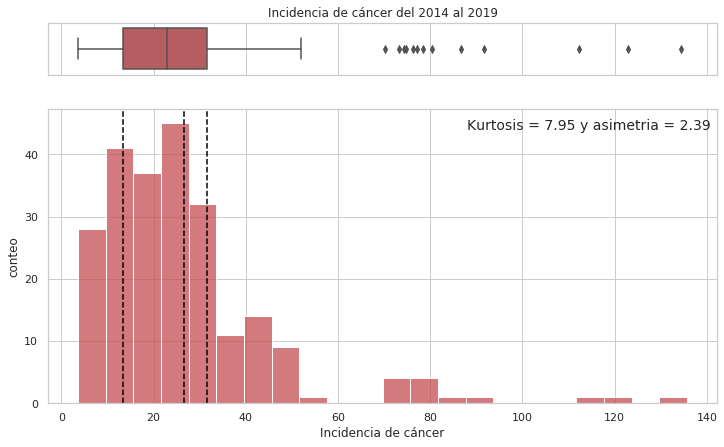

In [ ]:
# Analizamos el histograma y sus valores de kurtosis y asimetria

kur_mor = kurtosis(morbi["incidencia"])
asi_mor = skew(morbi["incidencia"])

# imprimimos el describe con los valores estadisticos
inci_des = morbi["incidencia"].describe()
print(inci_des)


# Parametros de la figura
fig, (ax_box, ax_hist) = plt.subplots(2,sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}, figsize=(12,7))

                                     
# Graficos
sns.boxplot(data=morbi, x="incidencia", ax=ax_box, color="r")
sns.histplot(data=morbi, x="incidencia", binwidth=6, ax=ax_hist, color="r")

# Lineas
ax_hist.axvline(inci_des[inci_des.index.get_loc("mean")],color='black',ls='--')
ax_hist.axvline(inci_des[inci_des.index.get_loc("25%")],color='black',ls='--')
ax_hist.axvline(inci_des[inci_des.index.get_loc("75%")],color='black',ls='--')

# Labels de las graficas
ax_box.set_title('Incidencia de c�ncer del 2014 al 2019')
ax_box.set(xlabel="")
ax_hist.text(88, 44, f'Kurtosis = {round(kur_mor, 2)} y asimetria = {round(asi_mor,2)}', fontsize=14)
ax_hist.set(ylabel='conteo', xlabel="Incidencia de c�ncer");




A partir del histograma y los valores de Curtosis y Asimetr�a podemos observar que la distribucion de la incidencia es asimetria positiva leptoc�rtica. Esto se puede ver muy claramente en la grafica de Boxplot donde se ven valores de outliers que pueden ser los causantes del sesgo que encontramos en los datos.

### Ahora analizaremos si existe una relaci�n entre el n�mero de mastograf�as y la incidencia por estado. 

In [ ]:
# hacemos la agrupacion y obtenemos los valores promedio de la incidencia
morbi_estado = morbi.groupby("estado")["incidencia"].mean()
morbi_estado = morbi_estado.to_frame()
morbi_estado = morbi_estado.reset_index()
morbi_estado = morbi_estado.drop(26)

# Tenemos que hacer un rename de la ciudad de M�xico a Distrito Federal para asociar a nuestro geojson
morbi_estado = morbi_estado.replace({"estado": renombre})

In [ ]:
# creamos un mapa de incidencia promedio para los a�os 2014-2016

mymap =  folium.Map(location=[25, -100], zoom_start=4.5, width="100%", height='100%')

folium.Choropleth(
    geo_data = mxn,
    name=f'Incidencia de c�ncer',
    data=morbi_estado,
    columns=['estado', 'incidencia'],
    key_on='feature.properties.estado',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=0.2,
    legend_name=f'Incidecia de c�ncer promedio'
).add_to(mymap)



folium.LayerControl().add_to(mymap)

mymap

In [ ]:
# Generamos un DS con el promedio de los datos de mastografias
masto_estado = masto.groupby("estado")['count'].mean()
masto_estado = masto_estado.to_frame()
masto_estado = masto_estado.reset_index()
masto_estado.head()

estado        count
0       Aguascalientes  1170.265306
1      Baja California  2240.382979
2  Baja California Sur   818.722222
3             Campeche  1182.953488
4              Chiapas   883.000000

In [ ]:
# ahora hacemos un merge con el DS de incidencia de c�ncer
morbi_masto = morbi_estado.merge(masto_estado)
morbi_masto.head()

estado  incidencia        count
0       Aguascalientes   70.047143  1170.265306
1      Baja California   27.981429  2240.382979
2  Baja California Sur   25.018571   818.722222
3             Campeche   95.078571  1182.953488
4              Chiapas   15.611429   883.000000

In [ ]:
# Ahora realizaremos la regresion lineal
lr = LinearRegression()

# Y obtenemos nuestros datos de prueba y entrenamiento
X = morbi_masto["count"].to_frame()
Y = morbi_masto["incidencia"]


In [ ]:
lr.fit(X, Y)

LinearRegression()

In [ ]:
y_predict = lr.predict(X)
y_predict

array([29.00464818, 27.8767755 , 29.37516429, 28.99127521, 29.3074174 ,
       27.68105277, 18.77458312, 28.85658143, 29.5000545 , 28.31689573,
       24.5642577 , 26.17633392, 26.73682676, 21.7170717 , 25.24040794,
       26.99812176,  8.82964491, 29.40142155, 27.13349303, 27.18900215,
       23.91787232, 26.77840184, 28.306661  , 27.49071559, 27.81733704,
       28.70946468, 27.95192137, 26.71503272, 28.94733416, 28.00398354,
       28.61688214, 28.33764979])

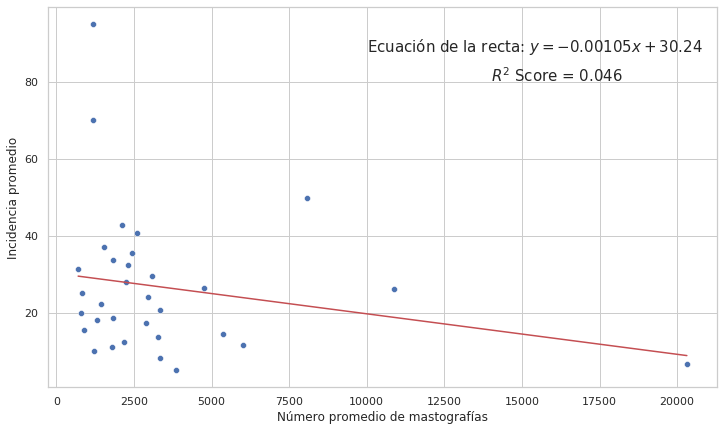

In [ ]:
# obtenemos el slope y el itercept
inter = round(lr.intercept_, 2)
slp = round(lr.coef_[0], 5)
r2 = round(metrics.r2_score(Y, y_predict), 3)

fig = plt.figure(figsize=(12,7))
ax = sns.scatterplot(x=X["count"], y=Y, color='b')
ax = sns.lineplot(x=X["count"], y=y_predict, color='r')
ax.text(10000, 88, r'Ecuaci�n de la recta: $y = {{{0}}}x + {{{1}}}$'.format(slp,inter), fontsize=15)
ax.text(14000, 80, r'$R^2$ Score = ${{{0}}}$'.format(r2), fontsize=15)
ax.set(ylabel='Incidencia promedio', xlabel="N�mero promedio de mastograf�as");

A partir del an�lisis de regresi� lineal simple podemos observar que los diferentes estados en M�xico no encuentran una relaci�n entre la incidencia de c�ncer. Sin embargo, hay que considerar que aqu� se tienen todos los datos, y como vimos, la aparici�n de muchos tumores altamente sugestivos a malignidad en el estado de Nuevo Le�n podr�a ser un factor a considerarse, entonces, filtraremos los datos de mastograf�as con tumores altamente sugestivos a malignidad y veamos que sucede.

In [ ]:
# Generamos un DS con el total de los datos de mastografias
masto_estado = masto[masto["resultado"] == "Altamente Sugestiva a Malignidad"].groupby("estado")['count'].mean()
masto_estado = masto_estado.to_frame()
masto_estado = masto_estado.reset_index()
masto_estado.head()

estado      count
0       Aguascalientes  35.166667
1      Baja California  21.166667
2  Baja California Sur   5.200000
3             Campeche  19.666667
4              Chiapas   8.200000

In [ ]:
# ahora hacemos un merge con el DS de incidencia de c�ncer
morbi_masto = morbi_estado.merge(masto_estado)
morbi_masto.head()

estado  incidencia      count
0       Aguascalientes   70.047143  35.166667
1      Baja California   27.981429  21.166667
2  Baja California Sur   25.018571   5.200000
3             Campeche   95.078571  19.666667
4              Chiapas   15.611429   8.200000

In [ ]:
# Ahora realizaremos la regresion lineal
lr = LinearRegression()

# Y obtenemos nuestros datos de prueba y entrenamiento
X = morbi_masto["count"].to_frame()
Y = morbi_masto["incidencia"]


In [ ]:
lr.fit(X, Y)

LinearRegression()

In [ ]:
y_predict = lr.predict(X)
y_predict

array([27.48127231, 28.13472191, 28.87996562, 28.20473437, 28.73994071,
       26.68779779, 22.14476724, 27.83911376, 28.82706732, 28.23585102,
       26.15103562, 28.53923833, 26.91339349, 25.22531535, 25.28754865,
       28.77728068, 16.51265401, 28.51590084, 16.11591675, 28.62480911,
       26.2988397 , 25.26421116, 27.47349315, 27.89356789, 27.46571399,
       27.7691013 , 27.24789745, 25.13196541, 28.22029269, 28.01025532,
       28.72593822, 27.92468454])

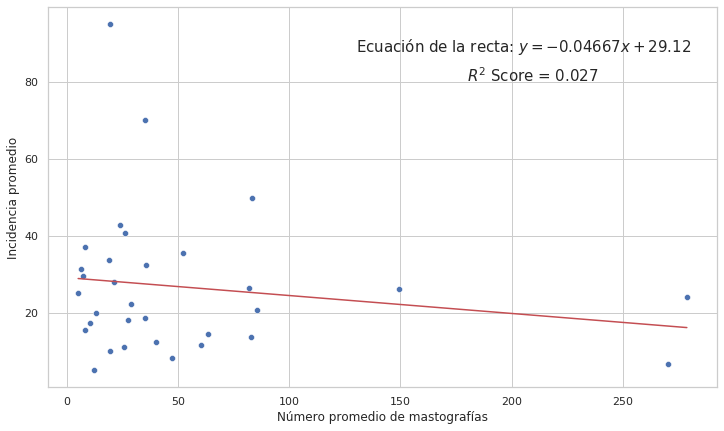

In [ ]:
# obtenemos el slope y el itercept
inter = round(lr.intercept_, 2)
slp = round(lr.coef_[0], 5)
r2 = round(metrics.r2_score(Y, y_predict), 3)

fig = plt.figure(figsize=(12,7))
ax = sns.scatterplot(x=X["count"], y=Y, color='b')
ax = sns.lineplot(x=X["count"], y=y_predict, color='r')
ax.text(130, 88, r'Ecuaci�n de la recta: $y = {{{0}}}x + {{{1}}}$'.format(slp,inter), fontsize=15)
ax.text(180, 80, r'$R^2$ Score = ${{{0}}}$'.format(r2), fontsize=15)
ax.set(ylabel='Incidencia promedio', xlabel="N�mero promedio de mastograf�as");

Con este resultado observamos que no existen ninguna relaci�n entre la incidencia de c�ncer y el n�mero de mastograf�as que presentan un "Altamente Sugestiva a Malignidad", por lo que estas variables son independientes, es decir, el n�mero de pruebas no va a arrojar nuevos valores de incidencia.

Esto se puede ver claramente pues si observamos los mapas del total de resultados por estado ninguno tiene coloraciones verde obscuro donde las coloraciones verde oscuro se presentan en la incidencia.


##### Finalmente vamos a ver que tanto aumento hay en la incidencia a lo largo de los a�os

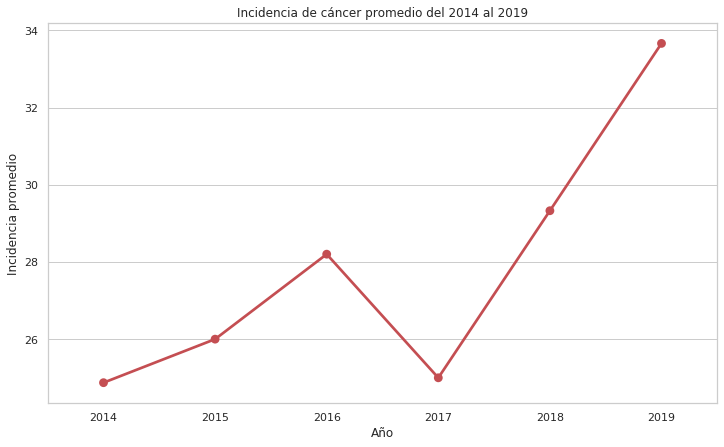

In [ ]:
# Hacemos una lista con las variables
morbi_ls = [morbi2014,morbi2015,morbi2016,morbi2017,morbi2018,morbi2019]

#analizamos en el tiempo los datos de morbilidad, si existe un aumento
avg_year = []

for i in range(0, len(morbi_ls)):
    f = morbi_ls[i]["incidencia"].mean()
    avg_year.append(f)
avg_year
avg_year = {'A�o': list(range(2014, 2020)), 
          'Incidencia promedio': avg_year }

avg_year = pd.DataFrame(avg_year)


fig = plt.figure(figsize=(12,7))
ax = sns.pointplot(x='A�o', y='Incidencia promedio', data=avg_year, color="r")
ax.set_title('Incidencia de c�ncer promedio del 2014 al 2019')
ax.set(ylabel='Incidencia promedio');


Observamos que existe un claro aumento en la incidencia de c�ncer de mama, aunque en el a�o 2017 disminuyo, para los siguientes a�os aumento de forma preocupante.

## ***A lo largo del tiempo se han disminuido un poco el n�mero total de mastograf�as realizadas, y la incidencia de c�ncer ha aumentado con los a�os, adem�s de no encontrarse una relaci�n estrecha entre el n�mero de mastograf�as realizadas y la incidencia en el c�ncer de mama, respondiendo as� la pregunta 1***

# **Equipo 2**
## **Proyecto: C�ncer de mama en M�xico**

#### Integrantes:
- Zo� Ariel Garc�a Mart�nez
- Atenea De La Cruz Brito
- Juan Luis Carrillo de la Cruz

### **Pregunta de investigaci�n 2**
#### **2. �Cu�l es la relaci�n entre los gastos de salud y los resultados en su pol�tica en la lucha contra el c�ncer?**

##### **2.1 M�xico**
En esta secci�n indagaremos cual ha sido el presupuesto para salud por estado de la Rep�blica Mexicana y lo relacionaremos con los �ndices de mortalidad por c�ncer de mama, con el fin de dilucidar si la dotaci�n de presupuesto para combatir esta enfermedad ha sido adecuada.


####**Dataset 1:** Gasto en Salud en el Sistema Nacional de Salud, M�xico

- **Observaciones:** Estados de la Rep�blica
- **Periodo:** 1993-2017
- **Archivo:** "1._GFF_01_2017_A_CONS_O.csv"
- **Fuente:** Direcci�n General de Informaci�n en Salud (DGIS) Secretar�a de Salud (SSA).

In [ ]:
#Librer�as
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statistics

##### **I. Carga de datos**

In [ ]:
## I. Cargar dataset
ssa_gasto = pd.read_csv("https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/SSA_mexico_clean/ssa_gasto.csv", sep=',')
ssa_gasto.head()

Estado  ... Aportaci�n federal % no asegurados
0  Estados Unidos Mexicanos  ...                               84.8
1            Aguascalientes  ...                               66.0
2           Baja California  ...                               95.8
3       Baja California Sur  ...                               96.0
4                  Campeche  ...                               86.1

[5 rows x 19 columns]

##### **II. Visualizaciones de datos**
- Exploraci�n visual de datos

###### **II.I Binning hexagonal**

In [ ]:
ssa_gasto_group = ssa_gasto.groupby('Estado')[['Total gasto en salud % PIB', 'Total gasto en salud % gasto p�blico']].max()
ssa_gasto_group.head()

Total gasto en salud % PIB  Total gasto en salud % gasto p�blico
Estado                                                                               
Aguascalientes                              3.5                                  30.0
Baja California                             3.8                                  30.8
Baja California Sur                         4.1                                  22.3
Campeche                                    2.3                                  12.7
Chiapas                                     5.8                                  20.7

In [ ]:
ssa_gasto_group['count'] = 1

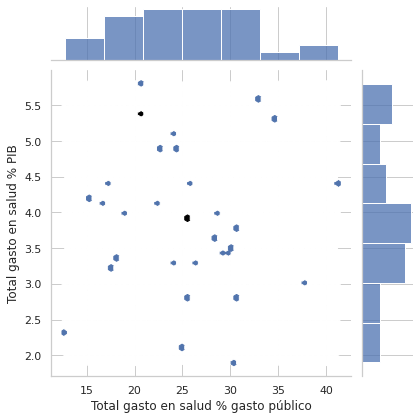

In [ ]:
sns.jointplot(x='Total gasto en salud % gasto p�blico', y='Total gasto en salud % PIB', data=ssa_gasto_group, kind='hex', ratio=5, joint_kws={'gridsize': 50});

###### **II.II Gr�ficas de barras**

In [ ]:
#S�lo Estados
filtro_estados = ssa_gasto['Estado'] !='Estados Unidos Mexicanos'
ssa_gasto_estados = ssa_gasto[filtro_estados]
ssa_gasto_estados.head()

Estado  ... Aportaci�n federal % no asegurados
1        Aguascalientes  ...                               66.0
2       Baja California  ...                               95.8
3   Baja California Sur  ...                               96.0
4              Campeche  ...                               86.1
5  Coahuila de Zaragoza  ...                               91.2

[5 rows x 19 columns]

In [ ]:
#Agregaci�n, groupby
gasto_salud_por_estado = ssa_gasto_estados.groupby('Estado')['Total gasto en salud per c�pita'].agg(pd.Series.mean)
gasto_salud_por_estado.head()

Estado
Aguascalientes         4482.525556
Baja California        4101.594444
Baja California Sur    6045.192222
Campeche               5662.099444
Chiapas                2721.615000
Name: Total gasto en salud per c�pita, dtype: float64

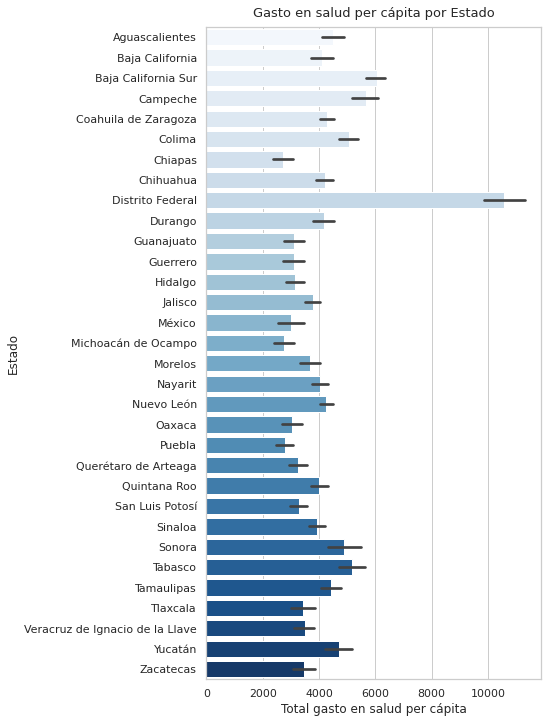

In [ ]:
#Gr�fica de barras
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(6,12))
ax = fig.add_subplot()
ax.set_title('Gasto en salud per c�pita por Estado', fontsize=13, pad=10);
sns.barplot(x="Total gasto en salud per c�pita", y="Estado", data=ssa_gasto_estados, ax=ax, palette='Blues');

#### **Dataset 2:** Mortalidad c�ncer de mama, M�xico
- **Observaciones:** Estados de la Rep�blica
- **Periodo:** 2000-2015
- **Archivo:** "MortalidadCaMa2000a2015.csv"
- **Fuente:** Direcci�n General de Informaci�n en Salud (DGIS) Secretar�a de Salud (SSA)
- **Descripci�n:** Defunciones de mujeres de 25 a�os y m�s por tumor maligno de mama (C50), 2000-2015

##### **I. Carga de datos**

In [ ]:
## I.Cargar datos en formato csv
#NOTA: Archivo en  latin-1
mortalidad = pd.read_csv("https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/SSA_mexico_clean/ssa_mortalidad.csv", sep=',', encoding='latin-1')
mortalidad.head()

Estado  num_2000  tasa_2000  ...  tasa_2014  num_2015  tasa_2015
0             Nacional      3419       14.1  ...       17.6      6252       18.0
1       Aguascalientes        36       15.6  ...       19.2        71       20.2
2      Baja California        98       16.7  ...       19.9       213       22.0
3  Baja California Sur        20       19.1  ...       15.6        33       16.0
4             Campeche        10        6.3  ...        6.8        29       11.4

[5 rows x 33 columns]

##### **II. Visualizaci�n de datos**

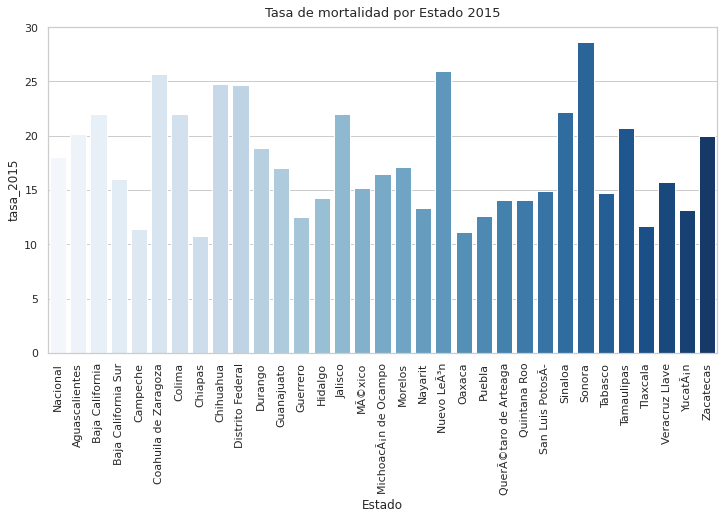

In [ ]:
#Boxplot
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()
ax.set_title('Tasa de mortalidad por Estado 2015', fontsize=13, pad=10)
ax.set_ylabel('Tasa de mortalidad %')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
sns.barplot(x="Estado", y="tasa_2015", data=mortalidad, ax=ax, palette='Blues');

##### **2.2. OCDE**

En esta secci�n revisaremos el gasto en salud de los pa�ses miembros de la Organizaci�n para la Cooperaci�n y el Desarrollo Econ�mico (OCDE), del cual forma parte M�xico. Asimismo, revisaremos indicadores sobre la incidencia del c�ncer de mama en dichos pa�ses, con el fin de relacionar el gasto devengado en materia sanitaria con las estrategias para combatir el c�ncer y sus resultados.

####**Dataset 3:** Global Health Expenditure Database (GHED), OMS

- **Observaciones:** 37 pa�ses miembros
- **Periodo:** 2000-2018
- **Archivo:** "WHO_NHA_indicators.csv"
- **Fuente:** Data Explorer, Organizaci�n Mundial de la Salud (OMS).
- **Descripci�n:** Gasto en Salud expresado como porcentaje del PIB a precios constantes. PPP indica precio paridad de producto, es decir, est� normalizado par su comparaci�n entre pa�ses con diferentes tipos de cambio y niveles de inflaci�n. 


##### **I. Carga de datos**

In [ ]:
## I.Cargar datos en formato csv
gasto_ocde = pd.read_csv("https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/OCDE_clean/ocde_gasto.csv", sep=',')
gasto_ocde.head(3)

Country                       Indicator  2000  2001  ...  2015  2016  2017  2018
0  Canada            Gasto en Salud % PIB     8     9  ...    11    11    11    11
1  Canada   Gasto en Salud PPP per c�pita  2430  2618  ...  4729  4909  5023  5200
2  Canada  Gasto P�blico % Gasto en Salud    73    73  ...    74    73    73    73

[3 rows x 21 columns]

##### **II. Procesamiento y exploraci�n**

In [ ]:
#Filtrar s�lo indicador 'Gasto en Salud % PIB'
ocde_pib = gasto_ocde['Indicator'] == 'Gasto en Salud % PIB'
ocde_pib.head()

0     True
1    False
2    False
3    False
4     True
Name: Indicator, dtype: bool

In [ ]:
#Aplicar selecci�n
gasto_ocde_pib = gasto_ocde[ocde_pib]
gasto_ocde_pib.head(3)

Country             Indicator  2000  2001  ...  2015  2016  2017  2018
0    Canada  Gasto en Salud % PIB     8     9  ...    11    11    11    11
4     Chile  Gasto en Salud % PIB     7     7  ...     8     9     9     9
8  Colombia  Gasto en Salud % PIB     6     6  ...     8     8     8     8

[3 rows x 21 columns]

In [ ]:
#Eliminar columna indicador, ya no es relevante
del gasto_ocde_pib['Indicator']
gasto_ocde_pib.head(3)

Country  2000  2001  2002  2003  2004  ...  2013  2014  2015  2016  2017  2018
0    Canada     8     9     9     9     9  ...    10    10    11    11    11    11
4     Chile     7     7     7     7     7  ...     7     8     8     9     9     9
8  Colombia     6     6     6     6     6  ...     7     7     8     8     8     8

[3 rows x 20 columns]

In [ ]:
#Cambiar �ndice
gasto_ocde_pib.set_index('Country')
gasto_ocde_pib.tail()

Country  2000  2001  2002  2003  ...  2014  2015  2016  2017  2018
128     United Kingdom     7     8     8     8  ...    10    10    10    10    10
132          Australia     8     8     8     8  ...     9     9     9     9     9
136              Japan     7     7     7     8  ...    11    11    11    11    11
140        New Zealand     7     8     8     8  ...     9     9     9     9     9
144  Republic of Korea     4     4     4     4  ...     6     7     7     7     8

[5 rows x 20 columns]

In [ ]:
#Visualizaci�n
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(6,12))
ax = fig.add_subplot()
ax.set_title('Gasto en Salud como porcentaje del PIB', fontsize=13, pad=10);
sns.barplot(x="2018", y="Country", data=gasto_ocde_pib, ax=ax, palette='Blues');

####**Dataset 4:** Health Status: Cancer, OCDE

- **Observaciones:** 37 pa�ses miembros
- **Periodo:** 2000-2012
- **Archivo:** "HEALTH_STAT_24022021235442318.csv"
- **Fuente:** OECD Statistics technology, Organizaci�n para la Cooperaci�n y el Desarrollo Econ�mico (OCDE).
- **Descripci�n:** Variable de inter�s, CANCBREC | Malignant neoplasms of female breast.


##### **I. Carga de datos**

In [ ]:
## I.Cargar datos en formato csv
cancer_ocde = pd.read_csv("https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/OCDE_clean/ocde_cancer.csv", sep=',')
cancer_ocde.head()

VAR                      Variable    Country        Year  Value
0  CANCTOCA           Malignant neoplasms  Australia  2002-01-01  312.0
1  CANCTOCA           Malignant neoplasms  Australia  2008-01-01  314.1
2  CANCTOCA           Malignant neoplasms  Australia  2012-01-01  323.0
3  CANCCOLC  Malignant neoplasms of colon  Australia  2002-01-01   41.7
4  CANCCOLC  Malignant neoplasms of colon  Australia  2008-01-01   38.7

##### **II. Procesamiento y exploraci�n**

In [ ]:
#Valores �nicos de variable para encontrar c�ncer de mama
cancer_ocde['Variable'].unique()
#Nota: El resultado que nos interesa es s�lo: 'Malignant neoplasms of female breast'

array(['Malignant neoplasms', 'Malignant neoplasms of colon',
       'Malignant neoplasms of lung',
       'Malignant neoplasms of female breast',
       'Malignant neoplasms of cervix', 'Malignant neoplasms of prostate'],
      dtype=object)

In [ ]:
#Subconjunto s�lo con informaci�n de c�ncer de mama
cancer_mama = cancer_ocde['Variable'] == 'Malignant neoplasms of female breast'
cancer_mama

0       False
1       False
2       False
3       False
4       False
        ...  
2971    False
2972    False
2973    False
2974    False
2975    False
Name: Variable, Length: 2976, dtype: bool

In [ ]:
#Aplicar selecci�n
cancer_mama_ocde = cancer_ocde[cancer_mama]
cancer_mama_ocde.head()

VAR                              Variable  ...        Year Value
369  CANCBREC  Malignant neoplasms of female breast  ...  2002-01-01  83.2
370  CANCBREC  Malignant neoplasms of female breast  ...  2008-01-01  84.8
371  CANCBREC  Malignant neoplasms of female breast  ...  2012-01-01  86.0
387  CANCBREC  Malignant neoplasms of female breast  ...  2000-01-01  67.2
388  CANCBREC  Malignant neoplasms of female breast  ...  2002-01-01  70.5

[5 rows x 5 columns]

In [ ]:
#Eliminar columnas irrelevantes de subconjunto
cancer_mama_ocde = cancer_mama_ocde.drop(['VAR', 'Variable'], axis=1)
cancer_mama_ocde.head()

Country        Year  Value
369  Australia  2002-01-01   83.2
370  Australia  2008-01-01   84.8
371  Australia  2012-01-01   86.0
387    Austria  2000-01-01   67.2
388    Austria  2002-01-01   70.5

In [ ]:
#Tipo de datos
cancer_mama_ocde_drop.dtypes

Country            object
Year       datetime64[ns]
Value             float64
dtype: object

In [ ]:
#Cambiar �ndice a Year
cancer_mama_ocde = cancer_mama_ocde.set_index('Year')
cancer_mama_ocde.head()

Country  Value
Year                        
2002-01-01  Australia   83.2
2008-01-01  Australia   84.8
2012-01-01  Australia   86.0
2000-01-01    Austria   67.2
2002-01-01    Austria   70.5

In [ ]:
sns.set_theme(style="whitegrid")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.set_title('Incidencia c�ncer de mama por cada 100mil mujeres', fontsize=13, pad=10);
sns.lineplot(x="Year", y="Value", hue='Country', data=cancer_mama_ocde, ax=ax, palette='Spectral', legend='brief');

###**Fuentes de bases de datos:**
#####**Pregunta 2**
DGIS (9 de mayo de 2019). �Gasto en Salud, 1993-2017 (miles de pesos constantes, 2017=100)�, Direcci�n General de Informaci�n en Salud (DGIS) Secretar�a de Salud (SSA), M�xico. Recuperado de: http://www.dgis.salud.gob.mx/descargas/xls/1._GFF_01_2017_A_CONS_O.xlsx

DGIS (2 de diciembre de 2016). "Defunciones de mujeres de 25 a�os y m�s por tumor maligno de mama (C50), 2000-2015", Direcci�n General de Informaci�n en Salud (DGIS) Secretar�a de Salud (SSA), M�xico. Recuperado de: https://www.gob.mx/cms/uploads/attachment/file/269549/MortalidadCaMa2000a2015.pdf

OCDE (1 de julio de 2020). �Health Status: Cancer�, OECD Statistics technology, Organizaci�n para la Cooperaci�n y el Desarrollo Econ�mico (OCDE). Recuperado de: https://stats.oecd.org/index.aspx?queryid=30121#

OMS (2 de marzo de 2021). �Global Health Expenditure Database (GHED)�, Data Explorer, Organizaci�n Mundial de la Salud (OMS). Recuperado de: https://apps.who.int/nha/database/Select/Indicators/en

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats 

# Pregunta de investigaci�n n�mero 3: 
## �Qu� pa�ses han logrado manejar el problema de manera adecuada?


Para comenzar a responder esta pregunta importo los data sets correspondientes a esta investigaci�n, los cuales se limpiaron el la secci�n pasada de esta fase:

In [ ]:
OCDE_salud = pd.read_csv('https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/OCDE_clean/OCDE_clean.csv', index_col=0)

#filtro por n�mero de casos en mujeres:

OCDE_salud_filtro = OCDE_salud[OCDE_salud['medida'] == 'number of female cases']
OCDE_salud_filtro.head()

variable  ...    valor
120  Malignant neoplasms of female breast  ...  11176.0
121  Malignant neoplasms of female breast  ...  13384.0
122  Malignant neoplasms of female breast  ...  14710.0
123  Malignant neoplasms of female breast  ...   4359.0
124  Malignant neoplasms of female breast  ...   4635.0

[5 rows x 5 columns]

In [ ]:
#ahora filtro los pa�ses que tienen registros en todos los a�os: 

OCDE_salud_ord = (OCDE_salud_filtro.groupby(['pais', 'year'])['valor'].max()).reset_index()

OCDE_salud_ord_2008 = OCDE_salud_ord[OCDE_salud_ord['year'] == 2002]['pais']

OCDE_paises = []
for i in OCDE_salud_ord_2008:
  x = OCDE_salud_ord[OCDE_salud_ord.loc[:, 'pais'] == i]
  OCDE_paises.append(x)

OCDE_paises = pd.concat(OCDE_paises).reset_index(drop = True)

pais  year     valor
0         Australia  2002   11176.0
1         Australia  2008   13384.0
2         Australia  2012   14710.0
3           Austria  2000    4359.0
4           Austria  2002    4635.0
..              ...   ...       ...
101  United Kingdom  2008   45624.0
102  United Kingdom  2012   52399.0
103   United States  2002  209995.0
104   United States  2008  182460.0
105   United States  2012  232714.0

[106 rows x 3 columns]

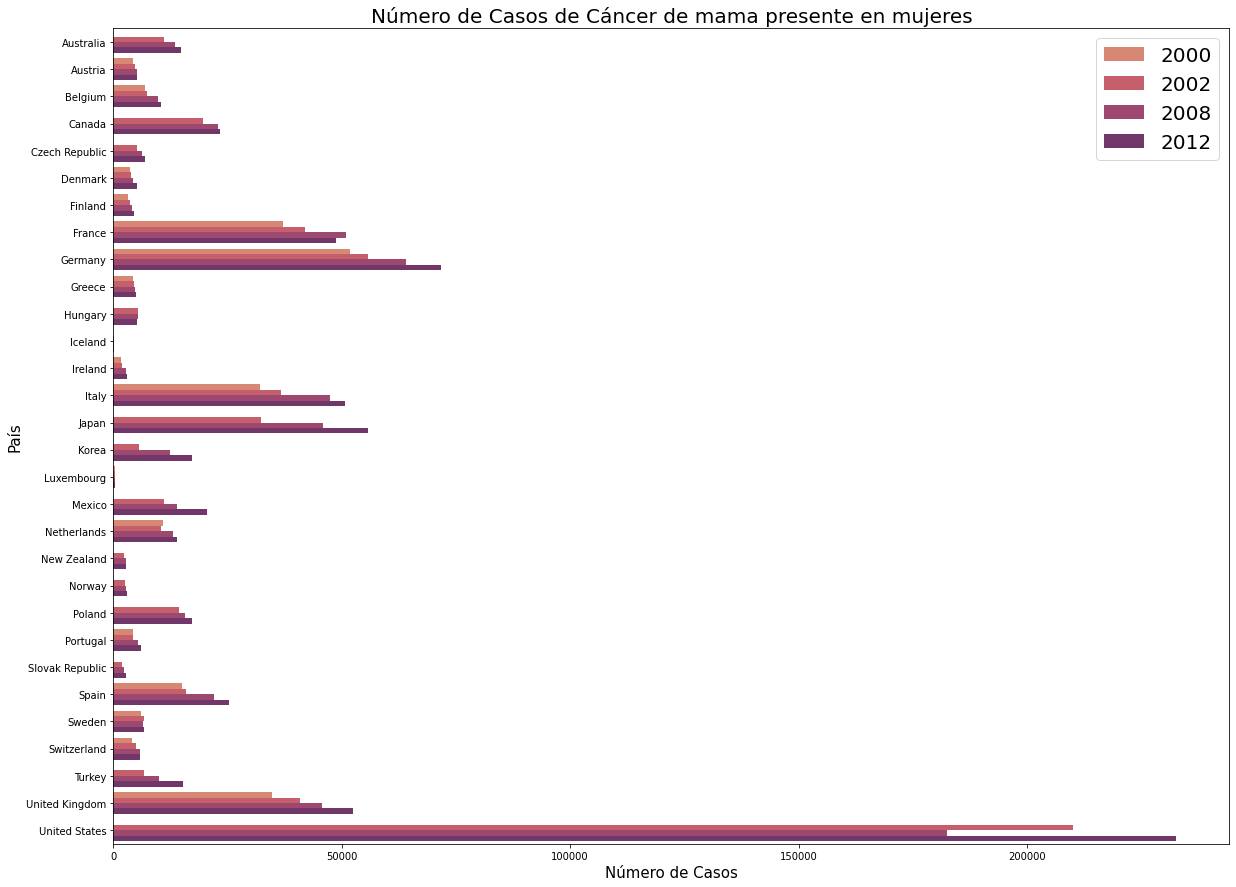

In [ ]:
#gr�fica de barras: 

plt.figure(figsize=(20,15))

sns.barplot(data = OCDE_paises, y = 'pais', x='valor', hue='year', palette='flare')

plt.title('N�mero de Casos de C�ncer de mama presente en mujeres', fontsize = 20)
plt.xlabel('N�mero de Casos', fontsize = 15)
plt.ylabel('Pa�s', fontsize = 15)

plt.legend(fontsize = 20)

plt.show()

In [ ]:
# ahora filtro los casos donde los n�meros son menores en 2012 que en 2008: 

Paises_menor = OCDE_salud_ord_2008[np.array(OCDE_paises[OCDE_paises['year'] == 2012]['valor']) <= np.array(OCDE_paises[OCDE_paises['year'] == 2008]['valor'])]

OCDE_paises_menor = []
for i in Paises_menor:
  x = OCDE_paises[OCDE_paises.loc[:, 'pais'] == i]
  OCDE_paises_menor.append(x)

OCDE_paises_menor = pd.concat(OCDE_paises_menor).reset_index(drop = True)

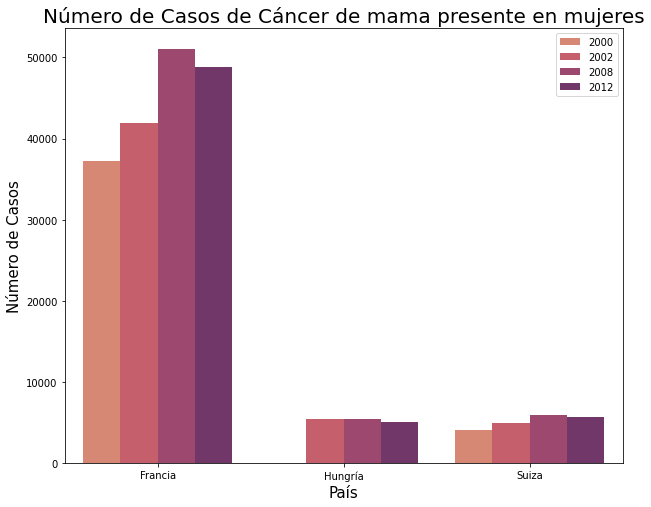

In [ ]:
#gr�fica de barras: 

plt.figure(figsize=(10,8))




sns.barplot(data = OCDE_paises_menor, x = 'pais', y='valor', hue='year', palette='flare')

plt.title('N�mero de Casos de C�ncer de mama presente en mujeres', fontsize = 20)
plt.ylabel('N�mero de Casos', fontsize = 15)
plt.xlabel('Pa�s', fontsize = 15)

plt.xticks([0,1,2], ['Francia', 'Hungr�a', 'Suiza'])

plt.legend()

plt.show()

#### Por lo tanto los pa�ses que han logrado bajar su n�mero de casos en el periodo 2000-2012 son Francia Hungr�a y Suiza. Aunque se desconoce el motivo de su �xito. 

#Pregunta de investigaci�n n�mero 4: 
## Hip�tesis: �Est� M�xico consciente de la problem�tica que trae consigo este problema de salud?

- Para comenzar importar� los datasets de inter�s por tema y b�squeda, que nos dan informaci�n acerca de qu� tanto destac� un tema en la web y qu� tantas b�squedas realizaron usuarios con respecto a un tema en espec�fico.

- Posteriormente se realizar� un an�lisis con respecto al Data Set que se adquiri� en el m�dulo pasado con Web Scrapping, en el que se tiene informaci�n acerca de art�culos que corresponden a b�squedas con el tema c�ncer de mama, en el periodo 2013-2019.

### Comienzo importando los DS correpondientes al inter�s por b�squeda y tema:

In [ ]:
#cargo mis archivos correspondientes al inter�s por b�squeda y al inter�s por tema
interes_tema = pd.read_csv('https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/Indice_Atencion/interes_mex_2013_2020_clean.csv', index_col=0)
interes_busqueda = pd.read_csv('https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/Indice_Atencion/interes_cancer_de_mama_busqueda_clean.csv', index_col=0)

#Ser� importante tener el a�o y el mes en una columna separada, entonces procedo a separar:

interes_busqueda['fecha'] = pd.to_datetime(interes_busqueda['fecha'])
interes_tema['fecha'] = pd.to_datetime(interes_tema['fecha'])

# agrego una columna que contenga el a�o
interes_tema['year'] = list(interes_tema.fecha.dt.year)
interes_busqueda['year'] = list(interes_busqueda.fecha.dt.year)

#agrego una columna que contenga el mes
interes_tema['mes'] = list(interes_tema.fecha.dt.month)
interes_busqueda['mes'] = list(interes_busqueda.fecha.dt.month)

#cargo los datos del 2013 al 2019: 
interes_tema = interes_tema[(interes_tema['year'] != 2012) & (interes_tema['year']<2020)]
interes_busqueda = interes_busqueda[interes_busqueda['year']<2020]

In [ ]:
print(f"el promedio del inter�s por tema es: {interes_tema['interes_en_cancer'].mean()}")
print(f"la mediana del inter�s por tema es: {interes_tema['interes_en_cancer'].median()}")
print(f"la media truncada correspondiente es: {stats.trim_mean(interes_tema['interes_en_cancer'], 0.1)}")
print(f"su desviaci�n est�ndar es de: {interes_tema['interes_en_cancer'].std()}")

el promedio del inter�s por tema es: 27.416666666666668
la mediana del inter�s por tema es: 21.0
la media truncada correspondiente es: 22.191176470588236
su desviaci�n est�ndar es de: 20.294938732418245


In [ ]:
print(f"el promedio de inter�s por b�squeda es: {interes_busqueda['interes_en_cancer'].mean()}")
print(f"la mediana de inter�s por b�squeda es: {interes_busqueda['interes_en_cancer'].median()}") 
print(f"la media truncada correspondiente es: {stats.trim_mean(interes_busqueda['interes_en_cancer'], 0.1)}")
print(f"su desviaci�n est�ndar es de: {interes_busqueda['interes_en_cancer'].std()}")

el promedio de inter�s por b�squeda es: 20.285714285714285
la mediana de inter�s por b�squeda es: 15.0
la media truncada correspondiente es: 16.294117647058822
su desviaci�n est�ndar es de: 18.18947890559658


- la diferencia entre la media truncada y la media tambi�n nos indica la presencia de outlayers en nuestro conjunto. 

- podemos ver que hay una dispersi�n grande entre los datos, ya que la desviaci�n est�ndar es grande con respecto al rango de los valores en ambos casos, ya que van del 0 al 100. 


In [ ]:
x = np.arange(0, 1.10, 0.10)

for i in range(len(x)):
  if i != 0: 
    print(f"el cuantil {round(x[i]*100, 1)} es: {interes_tema['interes_en_cancer'].quantile(x[i]):.3f}")

for i in range(len(x)):
  if i!=0:
    print(f"el cuantil {round(x[i]*100, 1)} es: {interes_busqueda['interes_en_cancer'].quantile(x[i]):.3f}")

el cuantil 10.0 es: 16.300
el cuantil 20.0 es: 18.000
el cuantil 30.0 es: 19.000
el cuantil 40.0 es: 20.000
el cuantil 50.0 es: 21.000
el cuantil 60.0 es: 23.000
el cuantil 70.0 es: 24.000
el cuantil 80.0 es: 28.000
el cuantil 90.0 es: 32.000
el cuantil 100.0 es: 100.000
el cuantil 10.0 es: 8.000
el cuantil 20.0 es: 10.200
el cuantil 30.0 es: 12.000
el cuantil 40.0 es: 13.000
el cuantil 50.0 es: 15.000
el cuantil 60.0 es: 17.800
el cuantil 70.0 es: 19.100
el cuantil 80.0 es: 23.000
el cuantil 90.0 es: 34.700
el cuantil 100.0 es: 100.000


- Con esto podemos ver que el �ndice de atenci�n normalmente est� por debajo del 30% de atenci�n en b�squeda.

In [ ]:
interes_tema['interes_en_cancer'].quantile(0.75) - interes_tema['interes_en_cancer'].quantile(0.25)

7.0

In [ ]:
interes_busqueda['interes_en_cancer'].quantile(0.75) - interes_busqueda['interes_en_cancer'].quantile(0.25)

10.25

- Con esto podemos ver que la distancia entre los datos t�picos dentro del DS no est�n tan distanciados entre s� y en realidad la atenci�n que se le da a este problema s� est� por debajo al 30% con respecto a los meses donde se focaliza la atenci�n.

#### ahora me concentrar� en visualizaciones:

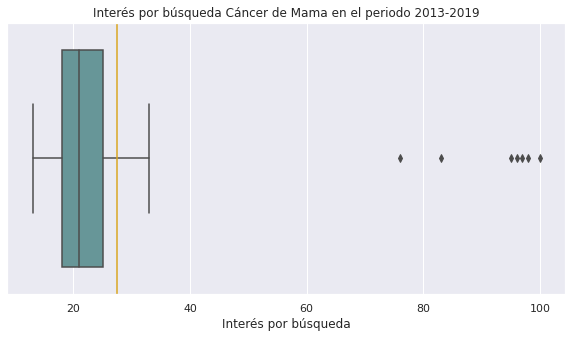

In [ ]:
sns.set(style = "darkgrid")

f = plt.figure(figsize=(10,5))

sns.boxplot(x = interes_tema['interes_en_cancer'], color='cadetblue')
plt.axvline (interes_tema['interes_en_cancer'].mean(), c = 'goldenrod')

plt.xlabel('Inter�s por b�squeda')
plt.title('Inter�s por b�squeda C�ncer de Mama en el periodo 2013-2019')

plt.show()

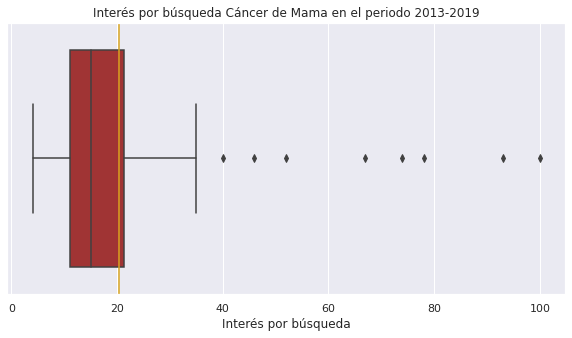

In [ ]:
sns.set(style = "darkgrid")

f = plt.figure(figsize=(10,5))

sns.boxplot(x = interes_busqueda['interes_en_cancer'], color='firebrick')
plt.axvline (interes_busqueda['interes_en_cancer'].mean(), c = 'goldenrod')

plt.xlabel('Inter�s por b�squeda')
plt.title('Inter�s por b�squeda C�ncer de Mama en el periodo 2013-2019')

plt.show()

#### Como podemos ver, hay algunos outlayers cargados hacia la derecha en ambos casos. Sin embargo, podemos limpiarlos para ver que efectivamente sin ellos la media se ajusta m�s a la media truncada que se hab�a calculado anteriormente en ambos casos.

In [ ]:
# ahora filtro los outlayers: 

def filtro_interq(col, dataframe):
  """esta funcion te da el df filtrado con el filtro inferior y superior de su rango intercuartilico"""
  iqr = col.quantile(0.75) - col.quantile(0.25)
  filtro_inferior = col > col.quantile(0.25) - iqr*1.5
  filtro_superior = col < col.quantile(0.75) + iqr*1.5

  df_filtrado = dataframe[filtro_inferior & filtro_superior]

  return df_filtrado


In [ ]:
interes_tema_filtrado = filtro_interq(interes_tema['interes_en_cancer'], interes_tema)
interes_busqueda_filtrado = filtro_interq(interes_busqueda['interes_en_cancer'], interes_busqueda)

In [ ]:
sns.set(style = "darkgrid")

f = plt.figure(figsize=(10,5))

sns.boxplot(x = interes_tema_filtrado['interes_en_cancer'], color='cadetblue')
plt.axvline (interes_tema_filtrado['interes_en_cancer'].mean(), c = 'goldenrod')

plt.xlabel('Inter�s por b�squeda')
plt.title('Inter�s por b�squeda C�ncer de Mama en el periodo 2013-2019')

plt.show()

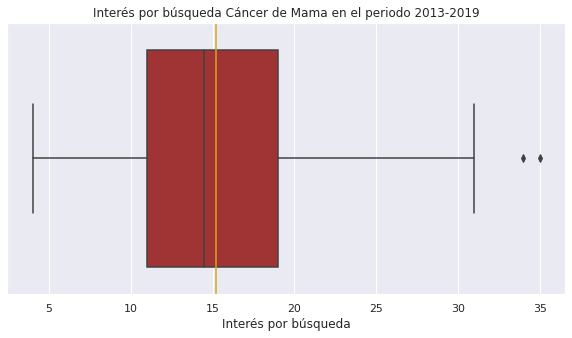

In [ ]:
sns.set(style = "darkgrid")

f = plt.figure(figsize=(10,5))

sns.boxplot(x = interes_busqueda_filtrado['interes_en_cancer'], color='firebrick')
plt.axvline (interes_busqueda_filtrado['interes_en_cancer'].mean(), c = 'goldenrod')

plt.xlabel('Inter�s por b�squeda')
plt.title('Inter�s por b�squeda C�ncer de Mama en el periodo 2013-2019')

plt.show()

#### Con esto podemos ver que efectivamente la atenci�n que se le da al problema es muy baja con respecto a ambas categor�as. Con excepci�n, claro, al mes donde tiene m�s atenci�n cada a�o.

#### para reforzar esta afirmaci�n se proceder� a realizar una tabla de frecuencias:

In [ ]:
segmentos_busqueda = pd.cut(interes_busqueda['interes_en_cancer'], 10)
segmentos_busqueda.groupby(segmentos_busqueda).count()

interes_en_cancer
(3.904, 13.6]    36
(13.6, 23.2]     32
(23.2, 32.8]      6
(32.8, 42.4]      3
(42.4, 52.0]      2
(52.0, 61.6]      0
(61.6, 71.2]      1
(71.2, 80.8]      2
(80.8, 90.4]      0
(90.4, 100.0]     2
Name: interes_en_cancer, dtype: int64

In [ ]:
segmentos_tema = pd.cut(interes_tema['interes_en_cancer'], 10)
segmentos_tema.groupby(segmentos_tema).count()

interes_en_cancer
(12.913, 21.7]    45
(21.7, 30.4]      27
(30.4, 39.1]       5
(39.1, 47.8]       0
(47.8, 56.5]       0
(56.5, 65.2]       0
(65.2, 73.9]       0
(73.9, 82.6]       1
(82.6, 91.3]       1
(91.3, 100.0]      5
Name: interes_en_cancer, dtype: int64

#### Donde podemos ver que la mayor parte del tiempo el inter�s en b�squedas de Google y el inter�s en Temas son muy bajos la mayor parte del tiempo.

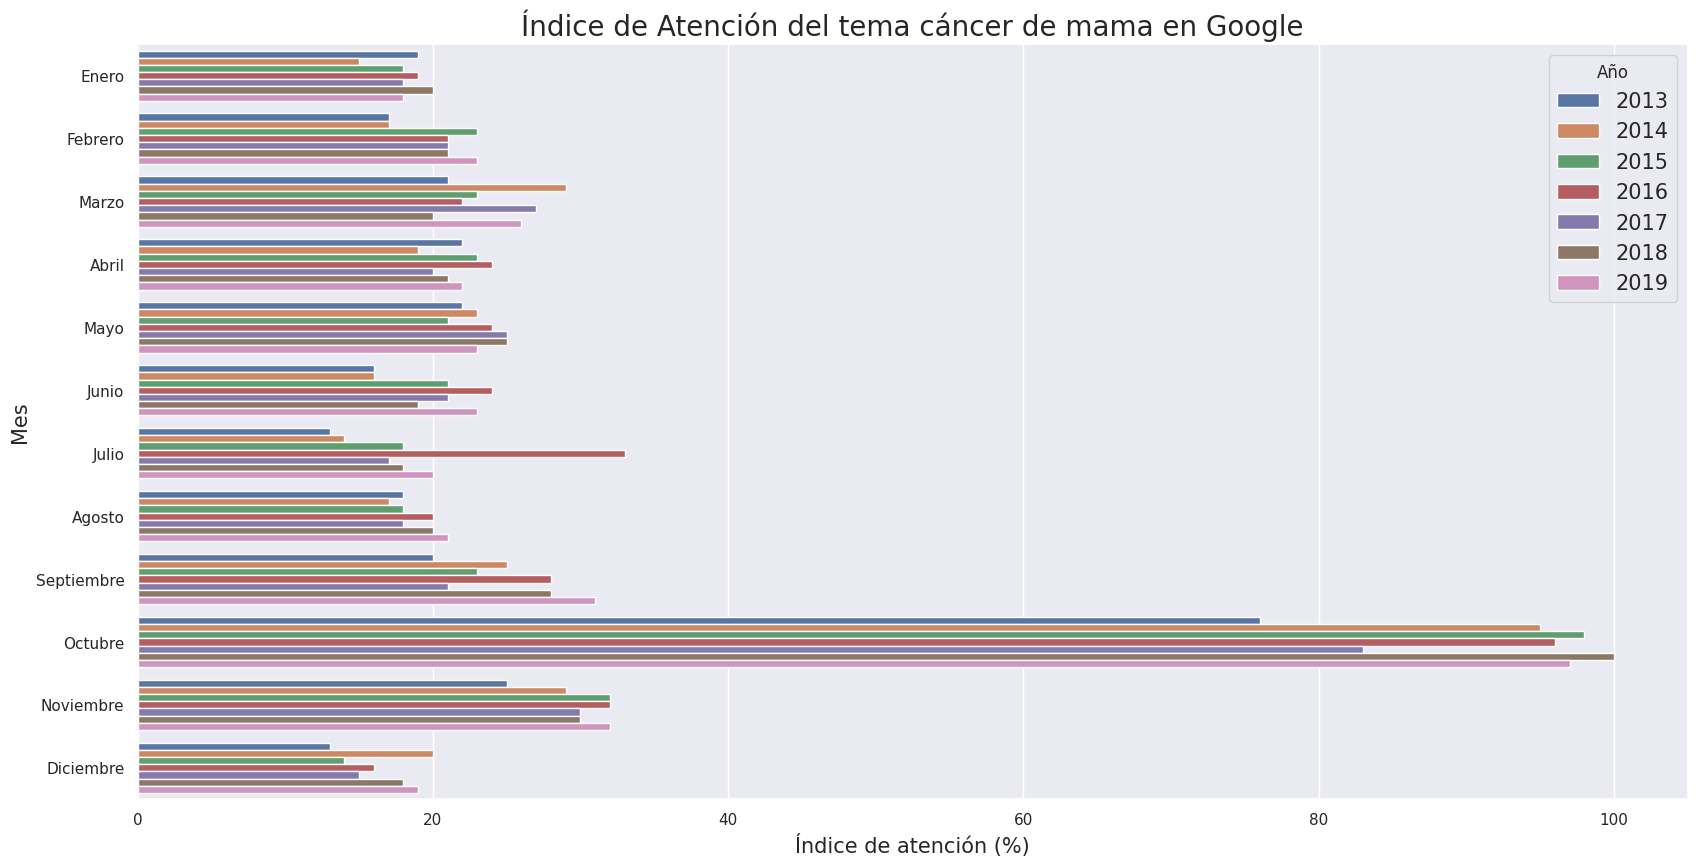

In [ ]:
plt.figure(figsize=(20,10), dpi = 100)

ax = sns.barplot(x = interes_tema['interes_en_cancer'], y = interes_tema['mes'], hue ='year' , data = interes_tema ,orient='h')

plt.xlabel('�ndice de atenci�n (%)', fontsize = 15)
plt.ylabel('Mes', fontsize = 15)

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.yticks([i for i in range(0,12)], meses)

plt.title('�ndice de Atenci�n del tema c�ncer de mama en Google', fontsize = 20)

ax.legend(title='A�o', fontsize = 15)

plt.show()

In [ ]:
plt.figure(figsize=(20,10), dpi = 100)

ax = sns.barplot(x = interes_busqueda['interes_en_cancer'], y = interes_busqueda['mes'], hue ='year' , data = interes_busqueda ,orient='h')

plt.xlabel('�ndice de atenci�n (%)', fontsize = 15)
plt.ylabel('Mes', fontsize = 15)

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.yticks([i for i in range(0,12)], meses)

plt.title('�ndice de Atenci�n de b�squedas c�ncer de mama en Google', fontsize = 20)

ax.legend(title='A�o')

plt.show()

#### A partir de estas visualizaciones podemos ver que hay una carga inmediata de atenci�n en el mes de Octubre, que es Octubre: Mes de Sensibilizaci�n sobre el C�ncer de Mama.

#### y esto en particular no representa un problema, de hecho nos dice que el labor que se realiza para sensiblizar y visibilizar el problema funciona, el problema es que fuera de este mes el problema se invisibiliza, ya que el �ndice de atenci�n fuera de estos meses decae por debajo del 30%.

#### Ahora veo la relaci�n entre las b�squedas realizadas por usuarios y el tema: 

In [ ]:
#para esto primero hago un DF que tiene los datos que me interesan: 
interes_tema['interes_aspecto'] = ['tema' for i in range(len(interes_tema['fecha']))]
interes_busqueda['interes_aspecto'] = ['busqueda' for i in range(len(interes_busqueda['fecha']))]

interes = pd.concat([interes_busqueda, interes_tema])
interes = interes.rename(columns={'interes_en_cancer':'interes'})

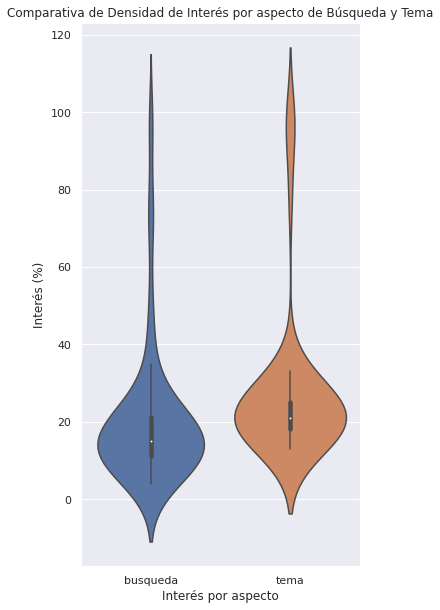

In [ ]:
# realizo una visualizaci�n de los datos con respecto a la distribuci�n de interes por tema e interes por b�squeda:

fig  = plt.figure(figsize = (5,10) )

sns.violinplot(data = interes, x = 'interes_aspecto', y = 'interes' )

plt.title('Comparativa de Densidad de Inter�s por aspecto de B�squeda y Tema', fontsize = 12)
plt.xlabel('Inter�s por aspecto')
plt.ylabel('Inter�s (%)')

plt.show()

#### como podemos ver en la visualizaci�n ambas parecen estar cargadas hac�a un bajo inter�s tanto por b�squeda como por tema, lo que en general nos da una idea de la importancia que se le ha dado en M�xico a este creciente problema. 

#### Otro aspecto que resulta interesante estudiar es si el inter�s por tema, es decir, qu� tanto se habla acerca del tema en la web, tiene relaci�n con el inter�s de las b�squedas.

In [ ]:
valores_tema = interes_tema['interes_en_cancer']
valores_busqueda = interes_busqueda['interes_en_cancer']

print(f"el coeficiente de pearson entre ambos intereses es: {(valores_tema.corr(valores_busqueda))}")

el coeficiente de pearson entre ambos intereses es: 0.8989676554293781


#### Como podemos ver parece ser que el qu� tanto se hable acerca de un tema repercute directamente en qu� tanto se realizan b�squedas al respecto. 

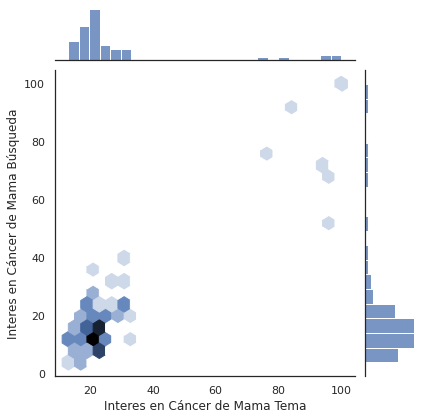

In [ ]:
# realicemos una gr�fica de dispersi�n: 
sns.set_style('white')
sns.jointplot(x = valores_tema, y = valores_busqueda, kind='hex')

plt.xlabel('Interes en C�ncer de Mama Tema')
plt.ylabel('Interes en C�ncer de Mama B�squeda')

plt.show()

#### Donde podemos ver que la parte que tiene m�s peso dentro de la correlaci�n es donde el inter�s es menor al 30% 

#### para ver qu� tanta correlaci�n entre ellos vamos a entrenar un modelo: 

In [ ]:
#scikit-learn

from sklearn.linear_model import LinearRegression as LR

In [ ]:
lr = LR()
lr.fit(valores_tema.to_frame(), valores_busqueda)

y_predict = lr.predict(valores_tema.to_frame())

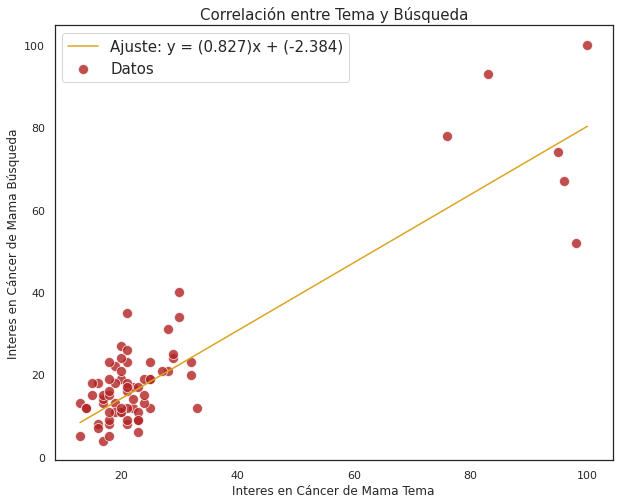

In [ ]:
plt.figure(figsize=(10,8))

sns.scatterplot(x = valores_tema, y = valores_busqueda, color = 'firebrick', alpha = 0.8, s=100, label='Datos')
sns.lineplot(x = valores_tema,y = y_predict, color = 'goldenrod', alpha = 1.0, label=f'Ajuste: y = ({lr.coef_[0]:.3f})x + ({lr.intercept_:.3f})')

plt.xlabel('Interes en C�ncer de Mama Tema')
plt.ylabel('Interes en C�ncer de Mama B�squeda')

plt.title('Correlaci�n entre Tema y B�squeda', fontsize = 15)

plt.legend(fontsize = 15)

plt.show()

#### Notemos que en este caso $R^2 = 0.89$, lo que dice que mi modelo puede predecir bien datos, sin embargo, al realizar la regresi�n con todos los datos podr�a haber una posibilidad de que mi modelo solo fuera bueno prediciendo los datos existentes dentro de mi DS.

#### Para demostrar la validez de mi modelo, lo someter� a una evaluaci�n nuevamente, esta vez con un DS de entrenamiento y uno de prueba:



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# nuevamente introduzco los valores, de los cuales quiero demostrar una correlaci�n
X = valores_tema
Y = valores_busqueda

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#entreno con el 30% de los datos:
X_training, X_test, Y_training, Y_test = train_test_split(X.to_frame(),Y,test_size = 0.3, shuffle = True)

In [ ]:
lr = LinearRegression()
lr.fit(X_training, Y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f"R^2 = {lr.score(X_test, Y_test):.3f}")

R^2 = 0.820


#### Notemos que en ambos casos el poder predictivo del modelo es alto, ya que $R^2 = 0.82$. Esto nos indica que cuando hay un tema en tendencia los usuarios tienden a buscar m�s informaci�n al respecto, en nuestro caso espec�fico, a cerca del c�ncer de mama. 

### Ahora importo los DS correspondientes al WebScrapping

In [ ]:
#importo mis DS y los junto en un DF

web_scrap = []

for i in range(3,10):
  x = pd.read_csv(f"https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/WebScrapping_clean/Scrapping_201{i}_clean.csv", index_col=0)
  web_scrap.append(x)

web_scrap = pd.concat(web_scrap)

In [ ]:
#creo un DF que tenga el conteo total de art�culos por mes y a�o:
web_scrap_count = web_scrap.groupby(['year', 'mes'])[['mes']].agg('count').rename(columns = {'mes':'total_articulos'}).reset_index()

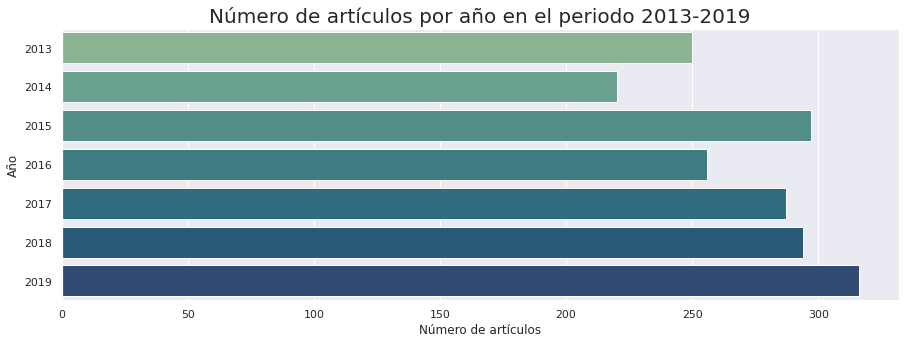

In [ ]:
#hagamos una visualizaci�n para ver c�mo ha cambiado el total de art�culos con respecto al tiempo: 
total_articulos = pd.Series(list(web_scrap_count.groupby(['year'])['total_articulos'].agg('sum')))
years = pd.Series([i for i in range(2013,2020)])

sns.set(style = "darkgrid")

plt.figure(figsize=(15,5))

sns.barplot(x=total_articulos, y = years, orient='h', palette='crest')

plt.xlabel('N�mero de art�culos')
plt.ylabel('A�o')

plt.title('N�mero de art�culos por a�o en el periodo 2013-2019', fontsize = 20)

plt.show()

#### para ver la tendencia creo un bubble plot y una regresi�n lineal: 

In [ ]:
#hago un modelo de regresi�n lineal:

from sklearn.linear_model import LinearRegression as LR
lr = LR()
lr.fit(years.to_frame(), total_articulos)

y_predict = lr.predict(years.to_frame())

#hago mi figura con los datos:

plt.figure(figsize=(15,5))

a = sns.scatterplot(x=total_articulos, y = years, palette='crest', size=total_articulos, sizes=(50, 200), hue = years)
b = sns.lineplot(x = y_predict, y = years, color = 'goldenrod', label = 'ajuste lineal')
plt.xlabel('N�mero de art�culos')
plt.ylabel('A�o')

plt.title('N�mero de art�culos por a�o en el periodo 2013-2019', fontsize = 20)

plt.legend([],[], frameon=False)

plt.show()

print(f'El coeficiente de pearson en este caso es de {years.corr(total_articulos):.3f}')

El coeficiente de pearson en este caso es de 0.777


#### Como podemos ver el n�mero de art�culos con respecto al a�o ha tenido un ligero repunte en los �ltimos a�os. Esta tendencia seguir� aumentando en los pr�ximos a�os.

#### Me interesa saber cual es la media de art�culos, para esto voy a hacer un proceso con bootstrapping:

In [ ]:
## Boostrap
articulos = web_scrap_count['total_articulos']
means = []

from numpy import random

random.seed(5)

for i in range(100_000): 
  sample = articulos.sample(n = 50, replace = True)
  means.append(sample.mean())

articulos_means = pd.Series(means)

In [ ]:
sns.displot(data = articulos_means, x = articulos_means, color = 'lightcoral', height=5, aspect = 2)
plt.axvline(articulos_means.mean(), c='firebrick')

plt.xlabel('N�mero promedio de art�culos')
plt.ylabel('Densidad')

plt.title('Bootstrapping N�mero promedio de art�culos', fontsize = 15)

plt.show()

print(f'el promedio de art�culos publicados es: {articulos_means.mean():.1f}')
print(f'error estandar: {articulos_means.std():.2f}')
print(f'valor m�nimo: {articulos_means.min()}')
print(f'valor m�ximo: {articulos_means.max()}')
print(f'Rango: {(articulos_means.max()- articulos_means.min()):.1f}')

el promedio de art�culos publicados es: 22.9
error estandar: 4.61
valor m�nimo: 10.62
valor m�ximo: 51.24
Rango: 40.6


#### Como indicaban los datos recopilados por Google trends, la media de los art�culos que tienen por tema ```c�ncer de mama``` es muy baja cuando no se cuenta el mes de octubre por ejemplo. 

#### Ahora quiero crear una visualizaci�n donde se pueda ver la cantidad de articulos publicados con respecto a los meses.

In [ ]:
from matplotlib.colors import ListedColormap

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
meses = [x.lower() for x in meses]

pd.DataFrame(web_scrap_count.groupby(['mes'])['total_articulos'].max()).loc[meses].T.plot.bar(stacked=True, 
              figsize=(12,6), colormap=ListedColormap(sns.color_palette("Paired", 12)))

plt.ylabel('N�mero de Articulos que hablan acerca de c�ncer de mama')
plt.xticks([])
plt.title('Comparaci�n art�culos C�ncer de Mama con respecto al Mes', fontsize = 20)

plt.show()

#### Como podemos ver la mayor parte de las publicaciones hechas tienen lugar en Octubre. 

#### algo que tambi�n resuta interesante estudiar por ejemplo cu�ntas publicaciones del total fueron realizadas por organismos gubernamentales

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# agrupo mi data data sets para revisar la informaci�n que est� contenida en los links:

web_links = web_scrap.groupby('titulo')['link'].max()
len(web_links)

1779

#### Algo interesante de esta agrupaci�n, por ejemplo es que es posible acceder al total de art�culos que han sido publicados por organos gubernamentales:

In [ ]:
#para esto filtro los datos por links que contengan la palabra 'gob':

print(f"el total publicaciones realizadas por organismos gubernamentales es de: {len(web_links[web_links.str.contains('.gob.', case=True)])}, en el periodo 2013-2019")
print(f"esto equivale al {((439/len(web_links))*100):.2f}% de las publicaciones en ese periodo")

el total publicaciones realizadas por organismos gubernamentales es de: 439, en el periodo 2013-2019
esto equivale al 24.68% de las publicaciones en ese periodo


#### adem�s de esto tambi�n podr�a ser conveniente saber cu�les son las palabras que m�s se repiten en el titulo de publicaciones en la web, para esto podemos revisar sobre los t�tulos del DS:

In [ ]:
titulos = web_scrap['titulo']

In [ ]:
# ahora limpio un poco: 

titulos = titulos.str.lower()
titulos = titulos.str.strip()
titulos = titulos.str.replace('[^\w\s]', '')
titulos = titulos.str.replace('\d', '')
titulos = titulos.str.replace('\\n', '')
titulos = titulos.dropna()

In [ ]:
#ahora separo las oraciones en palabras: 

tokenized = titulos.apply(nltk.word_tokenize)

all_words = tokenized.sum()

# Utilizamos FreqDist para analizar la distribuci�n de frecuencia de nuestras palabras

freq_dist = nltk.FreqDist(all_words)

print(freq_dist)

<FreqDist with 2657 samples and 15776 outcomes>


In [ ]:
#quito los conectores o stopwords: 

spanish_stop_words = stopwords.words('spanish')

all_words_except_stop_words = [word for word in all_words if word not in spanish_stop_words]

#filtro las palabras:
freq_dist = nltk.FreqDist(all_words_except_stop_words)

In [ ]:
freq_dist.most_common(50)

[('c�ncer', 1265),
 ('mama', 990),
 ('lucha', 152),
 ('salud', 139),
 ('d�a', 96),
 ('detecci�n', 96),
 ('mujeres', 92),
 ('prevenci�n', 79),
 ('m�xico', 61),
 ('mundial', 59),
 ('octubre', 55),
 ('imss', 54),
 ('centro', 52),
 ('mes', 49),
 ('tratamiento', 48),
 ('prevenir', 46),
 ('cancer', 45),
 ('secretar�a', 44),
 ('nacional', 43),
 ('campa�a', 43),
 ('riesgo', 42),
 ('diagn�stico', 37),
 ('detectar', 36),
 ('oportuna', 35),
 ('rosa', 35),
 ('hospital', 34),
 ('cl�nica', 33),
 ('especialistas', 32),
 ('instituto', 31),
 ('internacional', 31),
 ('m�dica', 30),
 ('pacientes', 27),
 ('autoexploraci�n', 26),
 ('juntos', 26),
 ('atenci�n', 26),
 ('sur', 23),
 ('mujer', 23),
 ('unam', 23),
 ('vida', 23),
 ('fundaci�n', 23),
 ('casos', 22),
 ('sensibilizaci�n', 21),
 ('causa', 21),
 ('infoc�ncer', 21),
 ('gobierno', 20),
 ('tiempo', 20),
 ('c�mo', 20),
 ('s�ntomas', 19),
 ('realiza', 18),
 ('combatir', 18)]

In [ ]:
# Conteo de una palabra y porcentaje de aparici�n

print(f'{(100 * freq_dist["c�ncer"] / len(all_words_except_stop_words)):.3f}%')

12.990%


#### �sta es la lista de las cincuenta palabras que destacan dentro de las b�squedas de Google. Como podemos ver, aunque la palabra `c�ncer` destaca en el top al igual que `mama`, con 1265 y 990 representaciones cada una, pero palabras como `prevenci�n` o `prevenir` aparecen a penas 76 y 46 veces.

#### Lo que nos indica que, aunque el contenido de la publicaci�n puede tener informaci�n acerca de la prevenci�n del c�ncer de mama, parece no ser el principal objetivo de la publicaci�n.

#### tambi�n notemos que aunque la palabra c�ncer aparece 1265 veces, a penas representa el 12.9% del conjunto de palabras que es posible encontrar en el t�tulo de una b�squeda de Google, sin contar palabras de conjunci�n.

#### A partir de estos datos tambi�n podemos generar visualizaciones de la frecuencia de las palabras: 

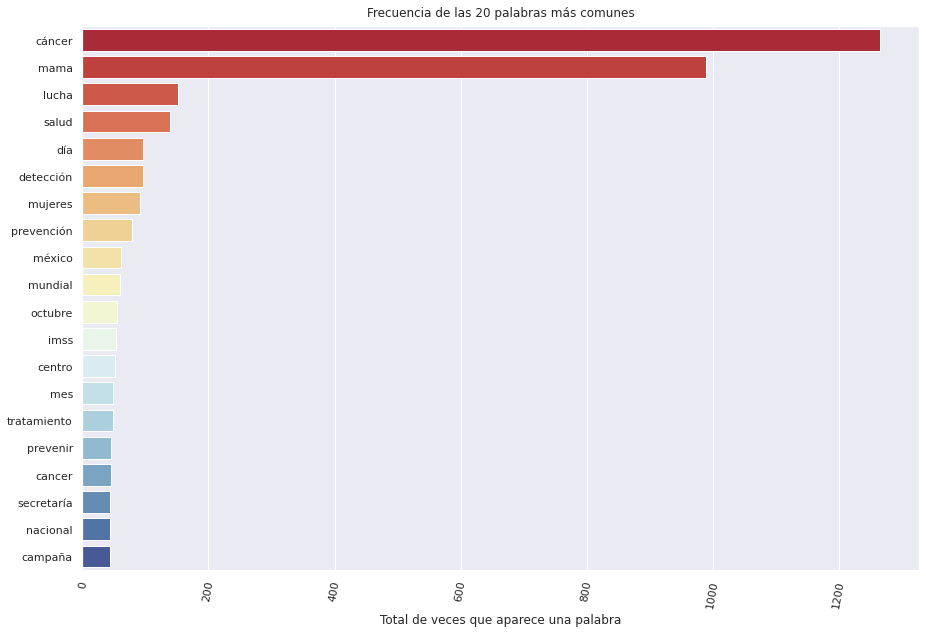

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist.most_common(20))))

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()

sns.barplot(y = most_common_20[:, 0], x = (most_common_20[:, 1]).astype(int), ax=ax, palette='RdYlBu', orient = 'h');
ax.set_title('Frecuencia de las 20 palabras m�s comunes', pad=10)
ax.set_xlabel('Total de veces que aparece una palabra')
ax.tick_params(axis='x', rotation=80)

plt.show()

#### por �ltimo realizar� una visualizaci�n con nubes de palabras para visualizar nuevamente las palabras que aparecen con m�s frecuencia dentro de las b�squedas de google al buscar `c�ncer de mama`, en el periodo 2013-2019. 

In [ ]:
from wordcloud import WordCloud

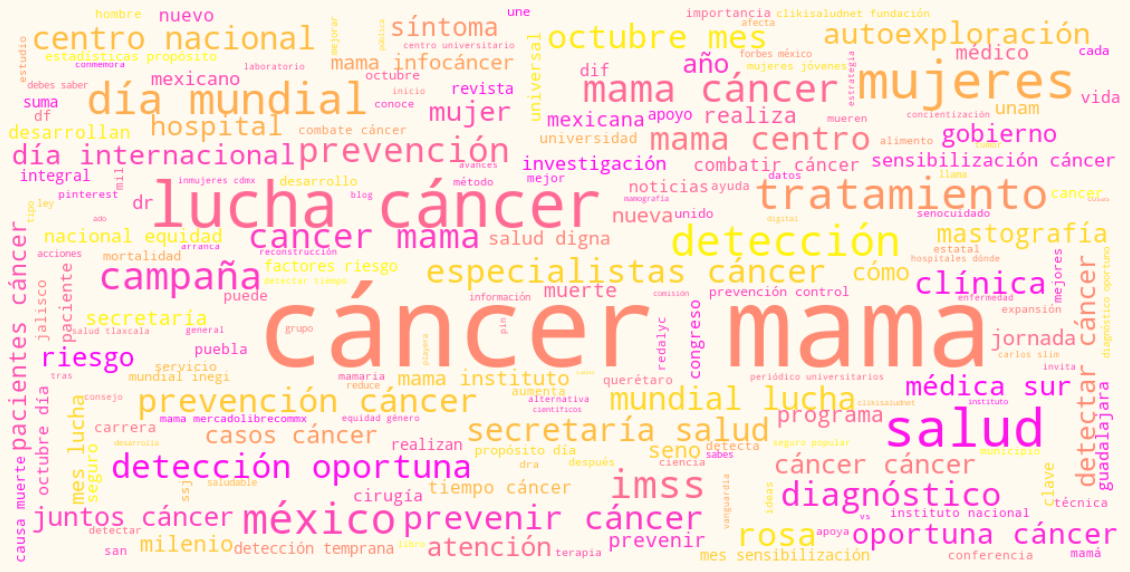

In [ ]:
plt.figure(figsize=(20,20), facecolor='floralwhite')


wordcloud = WordCloud(width=1000, height=500, max_font_size=100, background_color="floralwhite", colormap = "spring").generate(' '.join(all_words_except_stop_words))


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

plt.savefig('Mapa_cancer.png')

plt.show()

## Hip�tesis: �Est� M�xico consciente de la problem�tica que trae consigo este problema de salud?

#### A partir de los datos analizados podemos concluir, que si bien, el inter�s que tiene el p�blico con respecto al tema `c�ncer de mama` ha aumentado con el tiempo, no podemos decir, que se le de atenci�n suficiente, ya que el promedio de publicaciones realizadas es bajo y tanto el inter�s de b�squeda como el inter�s del tema est�n muy distanciados de el inter�s m�ximo de este tema con respecto al mes de octubre que es cuando se alcanza el m�ximo de inter�s, con un promedio de 150 publicaciones anuales.

#### A partir de esto, es posible afirmar que M�xico no est� consciente acerca de la problem�tica que trae consigo el c�ncer de mama, ya que, de tenerlo, autoridades (que como vimos solamente son responsables del 24% de las publicaciones realizadas), generar�an m�s contenido para tener una visibilidad mucho mayor y hacer consciente a la poblaci�n general, que la prevenci�n en una enfermedad como el c�ncer de mama, s� puede marcar la diferencia.


# **Equipo 2**
## **Proyecto: C�ncer de mama en M�xico**

#### Integrantes:
- Zo� Ariel Garc�a Mart�nez
- Atenea De La Cruz Brito
- Juan Luis Carrillo de la Cruz


### **Pregunta de investigaci�n 5**
####**Pregunta 5. �Qu� relaci�n existe entre otras enfermedades y factores de riesgo con el c�ncer de mama?**

####**Dataset 1:** Encuesta Nacional de Salud y Nutrici�n, Componente de Salud, M�xico

- **Observaciones:** Individuos de 20 a�os o m�s, muestra
- **Periodo:** 2018
- **Archivo:** "ensanut_cancer.csv"
- **Fuente:** INEGI e INSP.

####**I. Exploraci�n de Variables Categ�ricas y An�lisis Multivariable**

In [ ]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
#Dataset encuesta ENSANUT limpia y s�lo con registros de mastograf�as
df = pd.read_csv("https://raw.githubusercontent.com/zoegarm/Equipo_2_P2_Analisis/main/DATA_CLEAN/ENSANUT2018/ensanut_cancer.csv", index_col=None)
df.head()

obesidad  depresi�n  tristeza  ...  urbano_rural  regi�n  urbano_rurala
0         1          3         1  ...             1       2              1
1         1          1         1  ...             1       2              1
2         1          1         2  ...             1       2              1
3         2          1         2  ...             1       2              1
4         1          2         2  ...             1       2              1
5         2          1         1  ...             1       2              1
6         1          3         3  ...             1       2              1
7         2          1         1  ...             1       2              1

[8 rows x 23 columns]

In [ ]:
#Agrupar por resultado de mastograf�a
por_paciente = df.groupby(level=0)[['edad', 'exploraci�n_senos', 's�ntoma_previo_mama']].last()
por_resultado = df.groupby(level=0)['c�ncer_mama'].last()
unidos = por_paciente.merge(por_resultado, left_index=True, right_index=True)
#Resultados de mastograf�a 1=Positivo, 2=Negativo o bien
positivo = por_paciente[unidos['c�ncer_mama'] == 1]
negativo = por_paciente[unidos['c�ncer_mama'] == 2]

In [ ]:
por_paciente.head()

edad  exploraci�n_senos  s�ntoma_previo_mama
0    41                  2                    2
1    46                  8                    2
2    62                  2                    2
3    76                  2                    1
4    66                  8                    2

##### **I.I. Gr�fica de densidad**

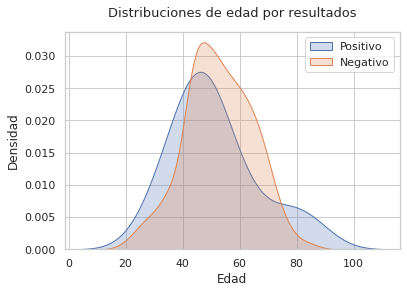

In [ ]:
#Gr�fica forma 1: "plt" � "pyplot"
sns.kdeplot(positivo['edad'], shade=True, label='Positivo')
sns.kdeplot(negativo['edad'], shade=True, label='Negativo')

plt.title('Distribuciones de edad por resultados', fontsize=13, pad=15)
plt.xlabel('Edad')
plt.ylabel('Densidad')

plt.legend(loc='upper right')
plt.show()

##### **I.II. Tabla de contingencias**

In [ ]:
#Tabla de contingencias
crossensanut = pd.crosstab(df['s�ntoma_previo_mama'], df['c�ncer_mama'], margins=True, margins_name='Totales')
crossensanut
#S�ntomas previos 1=S�, 2=No
#La mayor�a de los casos sin s�ntomas previos

c�ncer_mama           1    2  Totales
s�ntoma_previo_mama                  
1                    10   84       94
2                     3  381      384
Totales              13  465      478

##### **I.III. Boxplots y violinplots**

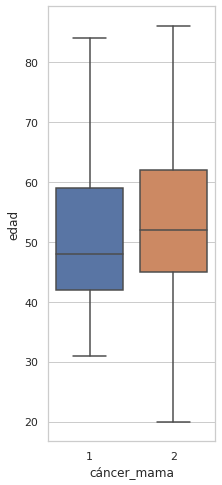

In [ ]:
#Boxplots y violinplots
plt.figure(figsize=(3,8))
sns.boxplot(data=unidos, x='c�ncer_mama', y='edad');

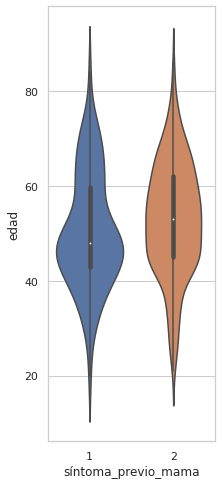

In [ ]:
plt.figure(figsize=(3,8))
sns.violinplot(data=unidos, x='s�ntoma_previo_mama', y='edad');

In [ ]:
#Grupo 2. Comorbilidades y c�ncer
por_comorbilidad = df.groupby(level=0)[['obesidad', 'diabetes','hipertensi�n', 'infarto', 
                                        'angina_de_pecho', 'insuficiencia_cardiaca','v�as_urinarias', 
                                        'c�lculos_renales', 'insuficiencia_renal']].last()
unidos2 = por_comorbilidad.merge(por_resultado, left_index=True, right_index=True)
#'c�ncer_mama'
#'obesidad', 'depresi�n', 'tristeza', 'fatiga', 'diabetes',
#       'hipertensi�n', 'infarto', 'angina_de_pecho', 'insuficiencia_cardiaca',
#       'v�as_urinarias', 'c�lculos_renales', 'insuficiencia_renal'

In [ ]:
#Grupo 3. Psicolog�a y c�ncer
por_psicologia = df.groupby(level=0)[['depresi�n', 'tristeza', 'fatiga']].last()
unidos3 = por_psicologia.merge(por_resultado, left_index=True, right_index=True)

In [ ]:
#Grupo 4. Factores de riesgo y c�ncer
por_riesgo = df.groupby(level=0)[['fuma_actual', 'cigarro_electr�nico', 'bebe_actual']].last()
unidos4 = por_riesgo.merge(por_resultado, left_index=True, right_index=True)

##### **I.III. Mapas de calor**
- Comorbilidades
- Estado de �nimo y psicol�gico
- Factores de riesgo

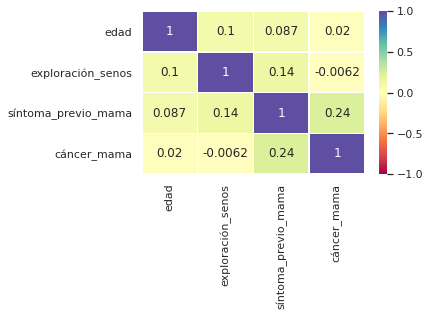

In [ ]:
#Mapa de calor 1. C�ncer
plt.figure(figsize=(5, 3))
ax = sns.heatmap(unidos.corr(), vmin=-1, vmax=1, annot=True, cmap="Spectral", linewidths=.5);
#La mayor relaci�n es entre s�ntomas previos y c�ncer de mama.

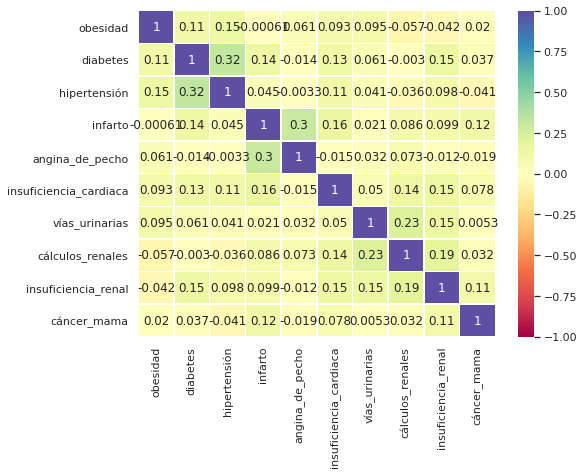

In [ ]:
#Mapa de calor 2. Comorbilidades
plt.figure(figsize=(8, 6))
ax = sns.heatmap(unidos2.corr(), vmin=-1, vmax=1, annot=True, cmap="Spectral", linewidths=.5);
#Las relaciones m�s fuertes se encuentran entre hipertensi�n y diabetes as� como angina de pecho e infarto.
#El c�ncer de mama presenta poca relaci�n, la m�s fuerte es con el infarto con s�lo 12%

In [ ]:
#Mapa de calor 3. Psicolog�a
plt.figure(figsize=(6, 4))
ax = sns.heatmap(unidos3.corr(), vmin=-1, vmax=1, annot=True, cmap="Spectral", linewidths=.5);
#La tristeza y la depresi�n est�n correlacionadas, sin embargo no se relacionan con el c�ncer de mama en la muestra.

In [ ]:
#Mapa de calor 4. Factores de riesgo
plt.figure(figsize=(6, 4))
ax = sns.heatmap(unidos4.corr(), vmin=-1, vmax=1, annot=True, cmap="Spectral", linewidths=.5);
#La �nica relaci�n entre factores de riesgo se encuentra entre fumar tabaco y cigarro electr�nico.
#Sin relaci�n aparente con el c�ncer de mama.

##### **I.IIII. Gr�fica de pares**

In [ ]:
#Gr�fica de pares
sns.pairplot(df);

####**II. Regresi�n lineal**
Modelo base de predicci�n: regresi�n lineal (OLS)
- A pesar de que el modelo que mejor se adec�a a los datos es un logit, se calcular� un OLS como primer paso.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
#Regresi�n
lr = LinearRegression()

lr.fit(df['c�ncer_mama'].to_frame(), df['s�ntoma_previo_mama'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Predicci�n
y_predict = lr.predict(df['c�ncer_mama'].to_frame())

In [ ]:
sns.scatterplot(x= df['c�ncer_mama'], y= df['s�ntoma_previo_mama'], s=40);
sns.lineplot(x= df['c�ncer_mama'], y= y_predict, color='g');
#Como era de esperarse, el modelo lineal no permite apreciar una buena representaci�n de los datos.
#Sin embargo, se distingue una correlaci�n positiva.

In [ ]:
#R^2 Coeficiente de correlaci�n
lr.score(df['c�ncer_mama'].to_frame(), df['s�ntoma_previo_mama'])
#El R^2 es muy bajo, la variable s�ntoma_previo_mama s�lo explica un 5.8% el c�ncer de mama para la muestra.

0.05801716514439615

#### **III. Regresi�n log�stica**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Variable dependiente y= c�ncer_mama, Variables independientes= resto del df
X = df.drop(columns=['c�ncer_mama'])
y = df['c�ncer_mama']

In [ ]:
#Separar, en este caso 30% de prueba y 70% de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#Regresi�n log�stica
log_reg = LogisticRegression(max_iter=10_000)

In [ ]:
#Ajustar
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Predicci�n
y_pred = log_reg.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Cercan�a al resultado
log_reg.score(X_test, y_test)
#Como se puede observar con el coeficiente de correlaci�n, el modelo explica en un 95.13% los resultados
#Muy por arriba del R^2 obtenido en el modelo lineal, que fue de 0.058017, es decir s�lo 5.8%.

0.9513888888888888

#### **IV. Matriz de confusi�n**
- Evaluaci�n del modelo

In [ ]:
from sklearn import  metrics

In [ ]:
#Matriz de confusi�n
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0,   7],
       [  0, 137]])

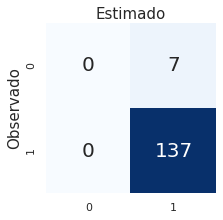

In [ ]:
class_names=[0,1]
fig, ax = plt.subplots(figsize=(3, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Representaci�n en heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Observado', fontsize=15, y=0.5)
plt.xlabel('Estimado', fontsize=15);

In [ ]:
#Clasificaciones verdadero negativo, falso positivo, falso negativo, verdadero negativo
VN, FP, FN, VP = cnf_matrix.ravel()
#Medidas
print("Precision:",metrics.precision_score(y_test, y_pred, average='binary', zero_division=1))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred, average='binary', zero_division=1))
print("Especificidad:", VN / (VN + FP))

Precision: 1.0
Exactitud: 0.9513888888888888
Sensibilidad: 0.0
Especificidad: 0.0


#### **V. Curva ROC**

- Evaluaci�n del modelo mediante curva ROC y AUC.

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
#Resultados probabil�sticos
y_pred_proba = log_reg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[4.47653532e-02, 9.55234647e-01],
       [3.57058879e-03, 9.96429411e-01],
       [7.33345841e-04, 9.99266654e-01],
       [1.03089686e-02, 9.89691031e-01],
       [5.95028738e-03, 9.94049713e-01],
       [8.67641341e-03, 9.91323587e-01],
       [1.00245175e-02, 9.89975483e-01],
       [3.29790154e-02, 9.67020985e-01],
       [5.21503463e-03, 9.94784965e-01],
       [3.67977651e-02, 9.63202235e-01]])

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

In [ ]:
#Gr�fica
plt.figure()
plt.plot(fpr, tpr, color='green',
         label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporci�n Falsos Positivos')
plt.ylabel('Proporci�n Verdaderos Positivos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()
#Como se observa, el modelo tiene un desempe�o deficiente con s�lo un 29% bajo a curva ROC

###**Fuentes de bases de datos:**
#####**Pregunta 5**
INEGI (2018). Cuestionario de Salud de Adultos (20 a�os o m�s)�, Encuesta Nacional de Salud y Nutrici�n, ENSANUT 2018, Componente de Salud, INEGI e INSP, M�xico. Recuperado de: https://ensanut.insp.mx/encuestas/ensanut2018/descargas.php 
